<a class="anchor" id="toc"></a>
# Оглавления

[Описание проекта](#about)
1.  [Откроем файл с данными и изучим общую информацию](#open_file)    
    1.1. [Импортируем библиотеки и укажем путь к датасету](#import)     
    1.2. [Выведем 20 первых строк на экран](#head)    
    1.3. [Выведем общую информацию о датафрейме](#info)


2. [Предобработка данных](#preprocessing)    
    2.1. [Изменим названия некоторых столбцов, чтобы с ними стало приятней работать](#rename)    
    2.2. [Определим в каких столбцах есть пропуски](#search_skip)    
    2.3. [Заполним пропуски там, где это возможно](#fill_skip)    
    2.4. [Исследуем уникальные значения в столбце с названиями населенных пунктов](#search_unique)    
    2.5. [Обработаем датасет на выдающиеся значения](#search_errors)


3. [Посчитаем и добавим в таблицу новые столбцы](#count_and_add_columns)    
    3.1. [Найдем столбцы, в которых нужно изменить тип данных, и преобразуем их](#search_type_errors)        
    3.2. [Добавим в таблицу новые столбцы](#add_columns)
   
   
4. [Проведем исследовательский анализ данных](#eda)    
    4.1. [Изучим некоторые параметры объектов](#study_param)    
    4.2. [Изучим, как быстро продавались квартиры](#study_sales)    
    4.3. [Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта](#study_corr)    
    4.4 [Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра](#count_price_of_square)    
    4.5. [Опишем, как стоимость объектов зависит от расстояния до центра города](#corr_price_and_center)
    
    
5. [Общий вывод](#conslusion)

 <a class="anchor" id="about"></a>
 ## Описание проекта

### Исследование объявлений о продаже квартир
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<a class="anchor" id="open_file"></a>
### 1. Откроем файл с данными и изучим общую информацию 

<a class="anchor" id="import"></a>
#### 1.1. Импортируем библиотеки и укажем путь к датасету

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

# отключим предупреждения
import warnings
warnings.simplefilter('ignore')

In [2]:
# импортируем датафрейм
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\\t', engine='python')

<a class="anchor" id="head"></a>
#### 1.2. Для ознаокомления с датафреймом выведем 20 первых строк на экран

In [3]:
data.head(20)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
13            20   3550000.0       42.80  2017-07-01T00:00:00      2   
14             1   4400000.0       36.00  2016-06-23T00:00:00      1   
15            16   4650000.0       39.00  2017-11-18T00:00:00      1   
16            11   6700000.0       82.00  2017-11-23T00:00:00      3   
17             6   4180000.0       36.00  2016-09-09T00:00:00      1   
18             8   3250000.0       31.00  2017-01-27T00:00:00      1   
19            16  14200000.0      121.00  2019-01-09T00:00:00      3   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.70          16.0        51.00      8          NaN  ...   
1              NaN          11.0        18.60      1          NaN  ...   
2              NaN           5.0        34.30      4          NaN  ...   
3              NaN          14.0          NaN      9          NaN  ...   
4             3.03          14.0        32.00     13          NaN  ...   
5              NaN          12.0        14.40      5          NaN  ...   
6              NaN          26.0        10.60      6          NaN  ...   
7              NaN          24.0          NaN     22          NaN  ...   
8              NaN          27.0        15.43     26          NaN  ...   
9             2.50           9.0        43.60      7          NaN  ...   
10            2.67          12.0        20.30      3          NaN  ...   
11             NaN           5.0        31.00      4        False  ...   
12             NaN           5.0        30.00      5          NaN  ...   
13            2.56           5.0        27.00      5          NaN  ...   
14             NaN           6.0        17.00      1          NaN  ...   
15             NaN          14.0        20.50      5          NaN  ...   
16            3.05           5.0        55.60      1          NaN  ...   
17             NaN          17.0        16.50      7          NaN  ...   
18            2.50           5.0        19.40      2          NaN  ...   
19            2.75          16.0        76.00      8          NaN  ...   

    kitchen_area  balcony              locality_name  airports_nearest  \
0          25.00      NaN            Санкт-Петербург           18863.0   
1          11.00      2.0             посёлок Шушары           12817.0   
2           8.30      0.0            Санкт-Петербург           21741.0   
3            NaN      0.0            Санкт-Петербург           28098.0   
4          41.00      NaN            Санкт-Петербург           31856.0   
5           9.10      NaN  городской посёлок Янино-1               NaN   
6          14.40      1.0          посёлок Парголово           52996.0   
7          18.90      2.0            Санкт-Петербург           23982.0   
8           8.81      NaN             посёлок Мурино               NaN   
9           6.50      2.0            Санкт-Петербург           50898.0   
10          8.50      NaN            Санкт-Петербург           38357.0   
11          6.00      1.0                  Ломон

<a class="anchor" id="info"></a>
#### 1.3. Выведем общую информацию о датафрейме

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

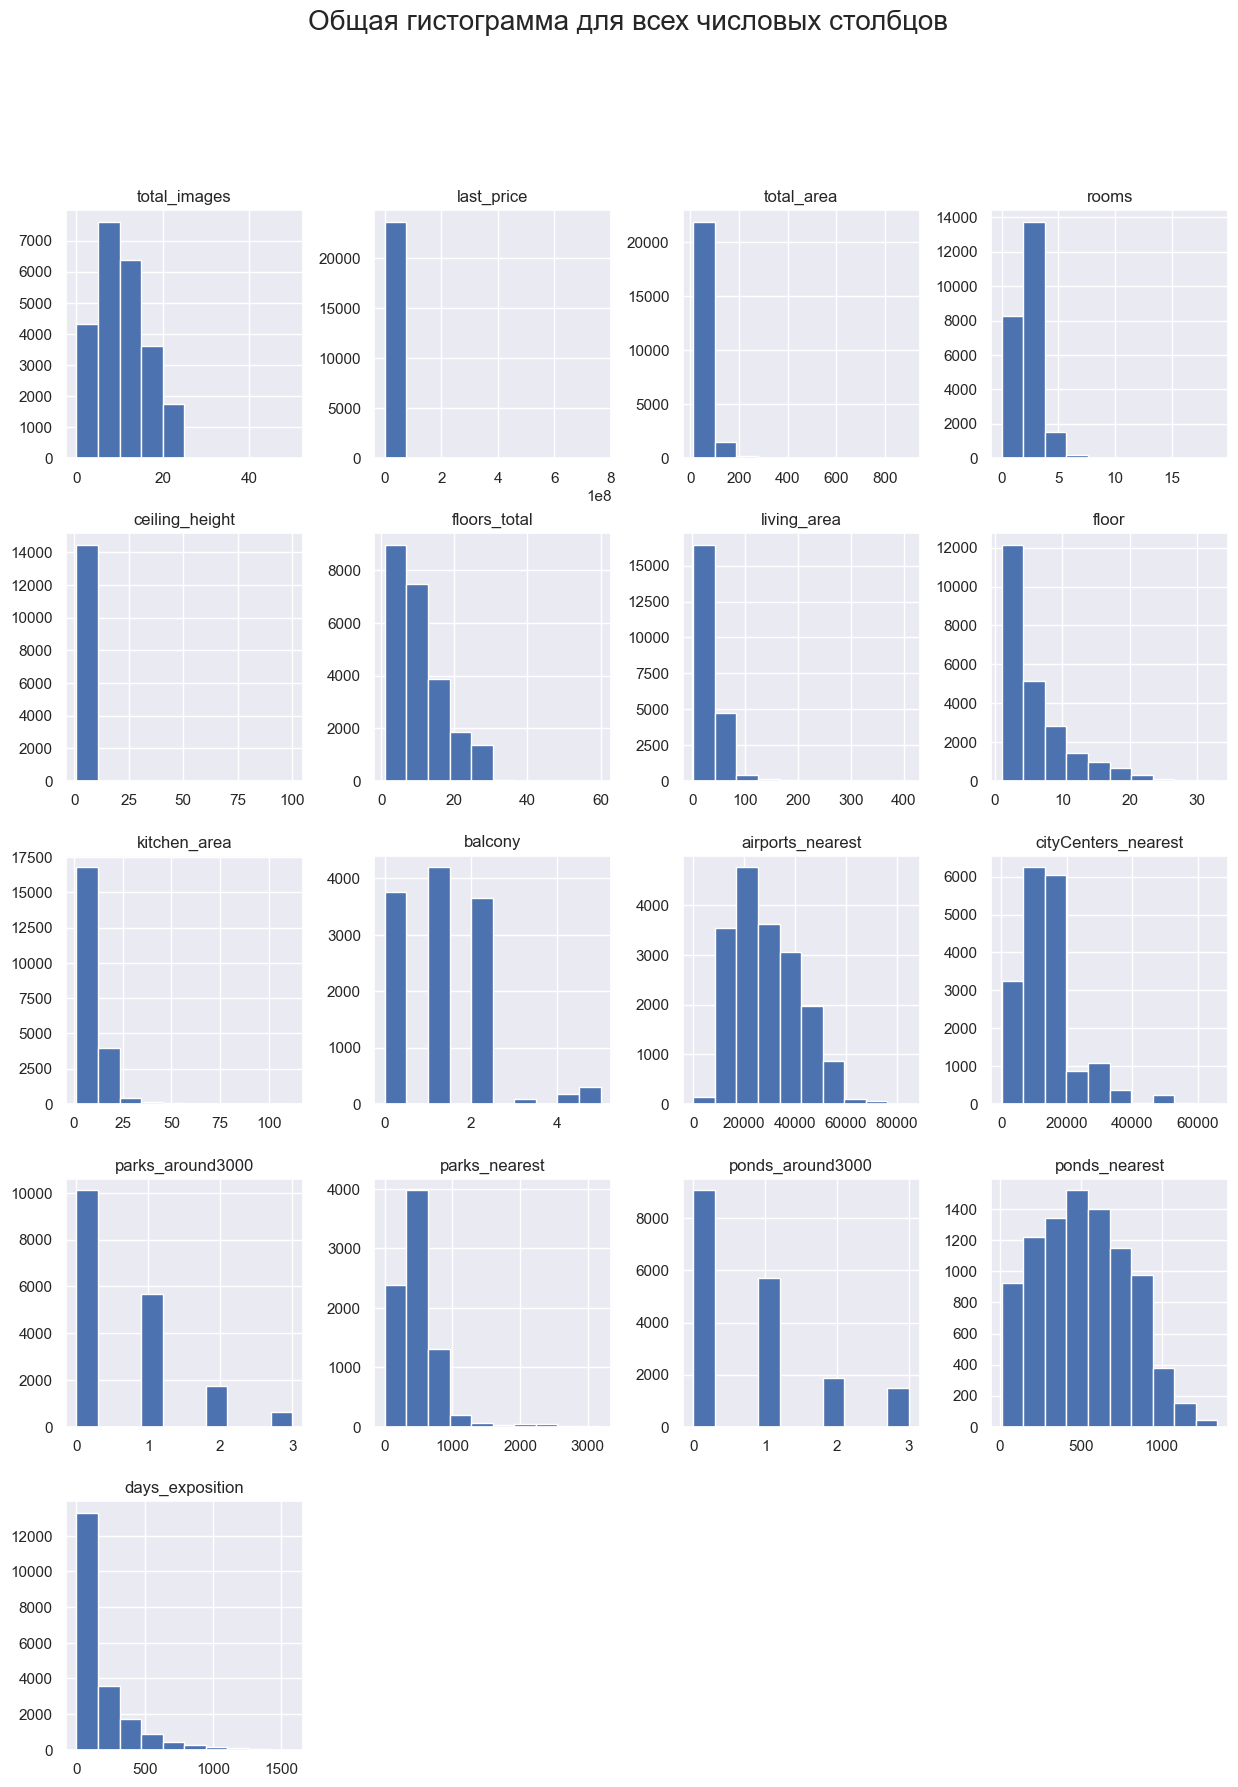

In [5]:
data.hist(figsize=(15, 20))
#plt.title('My title') # так почему-то не работает 
plt.suptitle('Общая гистограмма для всех числовых столбцов', fontsize=20)
plt.show()

Предварительно на гистограммах видны проблемы с колонками `last_price`, `total_area`, `living_area`, нереально большие цифры количества дней в `days_exposition`. Тип колонки `first_day_exposition` желательно перевести в `datetme`, чтобы можно было работоть с ней как с датой. В данных много пропусков, необходимо их также обработать.

<a class="anchor" id="preprocessing"></a>
### 2. Предобработка данных 

<a class="anchor" id="rename"></a>
#### 2.1. Сначала изменим названия некоторых столбцов, чтобы с ними стало приятней работать 

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around', 'ponds_around3000' : 'ponds_around'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

<a class="anchor" id="search_skip"></a>
#### 2.2. Определим в каких столбцах есть пропуски 

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around             5518
parks_nearest           15620
ponds_around             5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<a class="anchor" id="fill_skip"></a>
#### 2.3. Заполним пропуски там, где это возможно

Такие параметры, как: количество балконов, наличие парков и водоемов поблизости зачастую не указывают ввиду их отсутствия, либо их наличие несущественно (с точки зрения продавца) и на стоимость недвижимости не влияет. Заменим значения в них на 0:

In [9]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around'] = data['parks_around'].fillna(0)
data['ponds_around'] = data['ponds_around'].fillna(0)

Проверим перезаписанные значения

In [10]:
display(data['balcony'].isna().sum())
display(data['parks_around'].isna().sum())
data['ponds_around'].isna().sum()

0

0

0

___
--- 
Удалим записи, где не указан населенный пункт, т.к. в этом случае объявления составлены некорректно и вообще могли быть выложены по ошибке, а мы не можем котировать такие обьяления в рамках необходимой локации.

In [11]:
data = data.dropna(subset=['locality_name'])

Проверим корректность удаления

In [12]:
data['locality_name'].isna().sum()

0

Основные пропуски обработали. Снова выведем информацию о попусках

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around                0
parks_nearest           15586
ponds_around                0
ponds_nearest           14565
days_exposition          3180
dtype: int64

___
---
Проверим данные на явные дубликаты

In [14]:
data.duplicated().sum()

0

Явные дубликаты не обнаружены

___
---
Также были замечены записи с количеством комнат равное нулю, что либо ошибка, либо нежилое помещение. 

In [15]:
data.query('rooms == 0')

total_images  last_price  total_area first_day_exposition  rooms  \
144               1   2450000.0       27.00  2017-03-30T00:00:00      0   
349               4   2320000.0       25.00  2017-09-27T00:00:00      0   
440               8   2480000.0       27.11  2018-03-12T00:00:00      0   
508               0   3375000.0       34.40  2017-03-28T00:00:00      0   
608               2   1850000.0       25.00  2019-02-20T00:00:00      0   
...             ...         ...         ...                  ...    ...   
23210             7   3200000.0       26.00  2017-09-01T00:00:00      0   
23442             0   2500000.0       27.70  2017-09-28T00:00:00      0   
23554            15   3350000.0       26.00  2018-09-07T00:00:00      0   
23592            10   1450000.0       29.00  2017-11-11T00:00:00      0   
23637             8   2350000.0       26.00  2018-06-26T00:00:00      0   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
144               NaN          24.0        15.50      2          NaN  ...   
349               NaN          14.0        17.00      1          NaN  ...   
440               NaN          17.0        24.75      4          NaN  ...   
508               NaN          26.0        24.30     19          NaN  ...   
608               NaN          10.0          NaN      7          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
23210             NaN          25.0        18.00     16          NaN  ...   
23442             NaN          24.0        18.00      4          NaN  ...   
23554             NaN          19.0          NaN      8          NaN  ...   
23592             NaN           9.0        18.00      8          NaN  ...   
23637             NaN          25.0        17.00      4          NaN  ...   

       kitchen_area  balcony      locality_name  airports_nearest  \
144             NaN      2.0     посёлок Мурино               NaN   
349             NaN      0.0    деревня Кудрово               NaN   
440             NaN      2.0    Санкт-Петербург           38171.0   
508             NaN      1.0  посёлок Парголово           53115.0   
608             NaN      0.0     посёлок Шушары               NaN   
...             ...      ...                ...               ...   
23210           NaN      0.0    Санкт-Петербург           11405.0   
23442           NaN      2.0     посёлок Мурино               NaN   
23554           NaN      0.0    Санкт-Петербург           18090.0   
23592           NaN      2.0         Никольское               NaN   
23637           NaN      2.0      посёлок Бугры               NaN   

      city_centers_nearest  parks_around  parks_nearest  ponds_around  \
144                    NaN           0.0            NaN           0.0   
349                    NaN           0.0            NaN           0.0   
440                15015.0           0.0            NaN           2.0   
508                19292.0           0.0            NaN           1.0   
608                    NaN           0.0            NaN           0.0   
...                    ...           ...            ...           ...   
23210              13222.0           0.0            NaN           1.0   
23442                  NaN           0.0            NaN           0.0   
23554              17092.0           0.0            NaN           2.0   
23592                  NaN           0.0            NaN           0.0   
23637                  NaN           0.0            NaN           0.0   

       ponds_nearest  days_exposition  
144              NaN            181.0  
349              NaN             45.0  
440            982.0             64.0  
508            593.0            430.0  
608              NaN             29.0  
...              ...              ...  
23210          623.0             14.0  
23442            NaN              4.0  
23554          112.0             31.0  
23592            NaN             82.0  
23637            NaN            207

Запомним этот нюанс и заменим нулевые значения на `NaN`, чтобы было проще обрабатывать данные и выведем измененный срез на экран, а позже примем решение: удалить эти данные или оставить

In [16]:
data['rooms'] = data['rooms'].replace(0, np.nan)

In [17]:
data.query('rooms == 0')

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around, parks_nearest, ponds_around, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

<a class="anchor" id="search_unique"></a>
#### 2.4. Исследуем уникальные значения в столбце с названиями населенных пунктов

In [18]:
display(len(data['locality_name'].unique()))
data['locality_name'].unique()

364

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Отразим поблему наглядно

In [19]:
for x in data['locality_name'].unique():
    if 'Рябово' in x:
        print(x)

поселок Рябово
поселок городского типа Рябово
посёлок городского типа Рябово


**Найдено 364 уникальных записей. Из явных проблем:**
- присутствуют буквы е/ё, которые по-разному воспринимаются систомой
- присутствуют приставки типа "городского типа", "городской", которые воспринимаются как уникальные записи

Избавимся от лишних символов и слов

In [20]:
data['locality_name'] = data['locality_name'].replace(' городского типа', '')
data['locality_name'] = data['locality_name'].replace('ё', 'е')
data['locality_name'] = data['locality_name'].replace('городской ', '')

In [21]:
type(data.loc[1, 'locality_name'])

str

In [22]:
data['locality_name'] = data['locality_name'].str.replace(' городского типа', '')
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской ', '')

Проверим уникальные записи после обработки

In [23]:
display(len(data['locality_name'].unique()))
data['locality_name'].unique()

322

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Теперь Pandas нашел 322 уникальных значения, а значит мы избавились от 42 неявных дубликата. Корректность указанных типов селений (деревня/поселок/село и т.п.) мы проверять не будем ввиду излишних ресурсозатрат.

In [24]:
# например есть "поселок Лесное", а есть "коттеджный поселок Лесное"
for x in data['locality_name'].unique():
    if 'Лесное' in x:
        print(x)

поселок Лесное
коттеджный поселок Лесное


Проверим теорию с разным регистром, если вдруг мы упустили какие-то одинаковые записи с разным регистром букв

In [25]:
test_data = data
for x in test_data['locality_name']:
    x = x.lower()
    
len(test_data['locality_name'].unique())

322

Количество уникальных записей не изменилось, значит проблемы с регистром нет

<a class="anchor" id="search_errors"></a>
#### 2.5. Обработаем датасет на выдающиеся значения

Пробежимся по гистограммам, построенным в начале проекта, и проверим данные, на которые есть подозрения. Выведем гистограммы еще раз

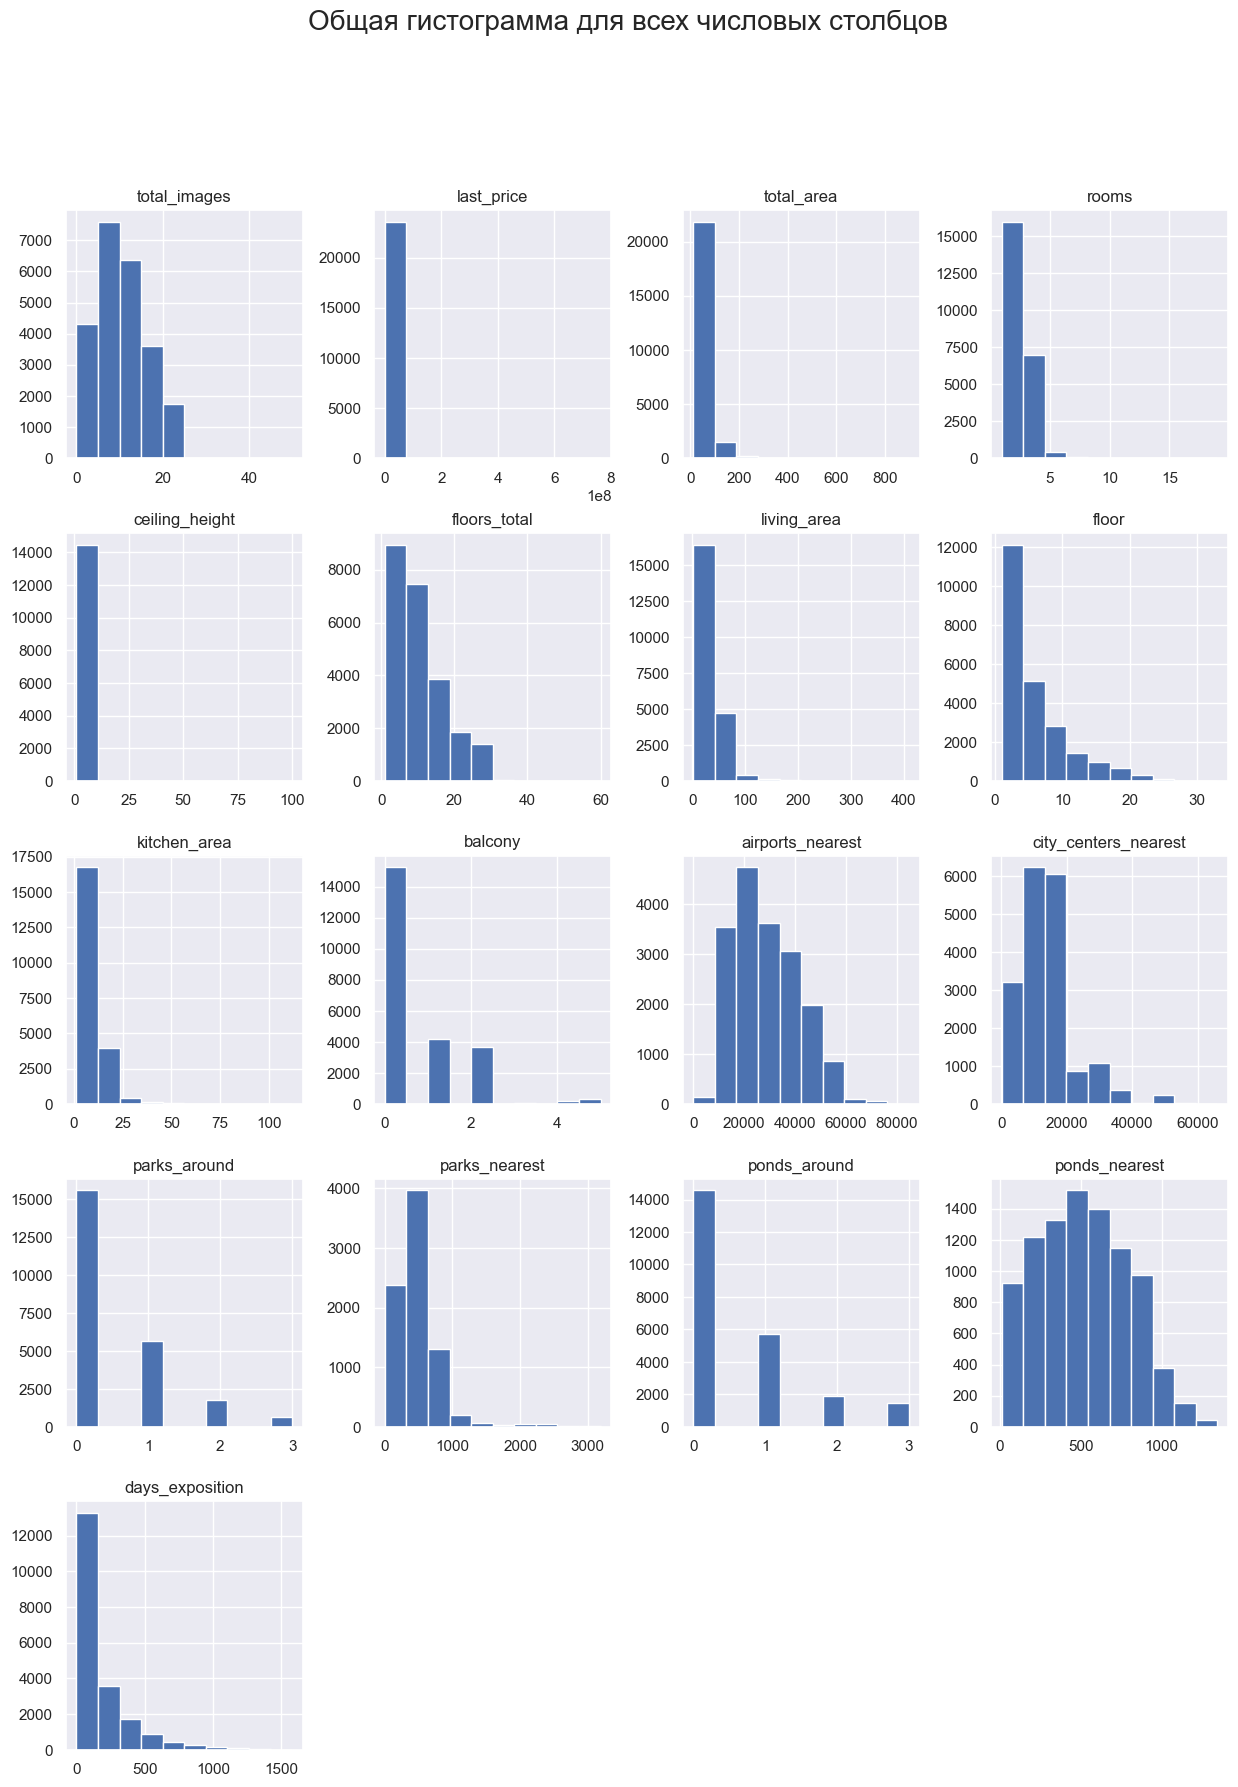

In [26]:
data.hist(figsize=(15, 20))
plt.suptitle('Общая гистограмма для всех числовых столбцов', fontsize=20)
plt.show()

___
---

Начнем с колонки `last_price`. На гистограмме не понятно распределение значений. Возможно просто следует построить ее вручную

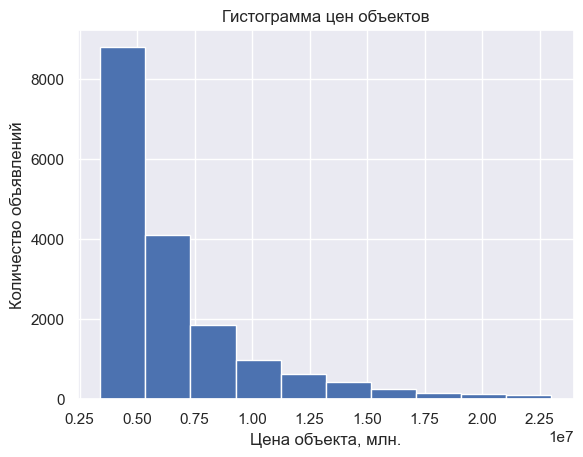

In [27]:
data['last_price'].plot(kind='hist', range=(3400000, 23000000), grid=True).set_title('Гистограмма цен объектов')
plt.xlabel('Цена объекта, млн.')
plt.ylabel('Количество объявлений');

Теперь график выглядит наглядно и правдоподобно: пик, где тенденция дешевой недвижимости, и длинный хвост с увеличением цены. Взглянем на граничные значения

In [28]:
display(data['last_price'].max())
data['last_price'].min()

763000000.0

12190.0

Очень огромный разброс для цен на квартиры. Взглянем на эти позиции в отсортированном по цене списке датафрейма. Начнем с самой низкой цены:

In [29]:
data.sort_values('last_price').head()

total_images  last_price  total_area first_day_exposition  rooms  \
8793              7     12190.0       109.0  2019-03-20T00:00:00    2.0   
17456             7    430000.0        30.4  2019-04-22T00:00:00    1.0   
14911             5    430000.0        54.0  2018-06-26T00:00:00    2.0   
16274            18    440000.0        40.0  2018-07-10T00:00:00    1.0   
17676             0    450000.0        36.5  2018-02-01T00:00:00    1.0   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
8793             2.75          25.0         32.0     25          NaN  ...   
17456             NaN           2.0         16.0      1          NaN  ...   
14911             NaN           3.0          NaN      3          NaN  ...   
16274             NaN           5.0          NaN      1          NaN  ...   
17676             NaN           5.0         17.3      4          NaN  ...   

       kitchen_area  balcony          locality_name  airports_nearest  \
8793           40.5      0.0        Санкт-Петербург           36421.0   
17456           6.0      0.0                 Сланцы               NaN   
14911           NaN      0.0  поселок станции Свирь               NaN   
16274           NaN      0.0     деревня Старополье               NaN   
17676           8.5      1.0      деревня Ям-Тесово               NaN   

      city_centers_nearest  parks_around  parks_nearest  ponds_around  \
8793                9176.0           1.0          805.0           0.0   
17456                  NaN           0.0            NaN           0.0   
14911                  NaN           0.0            NaN           0.0   
16274                  NaN           0.0            NaN           0.0   
17676                  NaN           0.0            NaN           0.0   

       ponds_nearest  days_exposition  
8793             NaN              8.0  
17456            NaN              NaN  
14911            NaN             44.0  
16274            NaN             45.0  
17676            NaN            120.0  

[5 rows x 22 columns]

Сразу видим, что запись с такой низкой ценой всего одна и она не похожа на цену продажи квартиры. Скорее всего в базу попала запись с арендной стоимостью квартиры. Удалим эту строку

In [30]:
data.drop(8793, inplace=True)

Выведем снова данные чтобы убедиться, что запись удалена

In [31]:
data.sort_values('last_price').head()

total_images  last_price  total_area first_day_exposition  rooms  \
17456             7    430000.0        30.4  2019-04-22T00:00:00    1.0   
14911             5    430000.0        54.0  2018-06-26T00:00:00    2.0   
16274            18    440000.0        40.0  2018-07-10T00:00:00    1.0   
9581              7    450000.0        43.4  2018-08-31T00:00:00    2.0   
16219            14    450000.0        38.5  2018-07-11T00:00:00    2.0   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
17456             NaN           2.0         16.0      1          NaN  ...   
14911             NaN           3.0          NaN      3          NaN  ...   
16274             NaN           5.0          NaN      1          NaN  ...   
9581              NaN           5.0         30.3      3          NaN  ...   
16219            2.65           2.0          NaN      1          NaN  ...   

       kitchen_area  balcony          locality_name  airports_nearest  \
17456           6.0      0.0                 Сланцы               NaN   
14911           NaN      0.0  поселок станции Свирь               NaN   
16274           NaN      0.0     деревня Старополье               NaN   
9581            5.5      0.0     деревня Старополье               NaN   
16219           NaN      0.0   деревня Вахнова Кара               NaN   

      city_centers_nearest  parks_around  parks_nearest  ponds_around  \
17456                  NaN           0.0            NaN           0.0   
14911                  NaN           0.0            NaN           0.0   
16274                  NaN           0.0            NaN           0.0   
9581                   NaN           0.0            NaN           0.0   
16219                  NaN           0.0            NaN           0.0   

       ponds_nearest  days_exposition  
17456            NaN              NaN  
14911            NaN             44.0  
16274            NaN             45.0  
9581             NaN             96.0  
16219            NaN             45.0  

[5 rows x 22 columns]

Займемся огромными значениями. Выведем отсортированные по цене данные, начиная с самой крупной цены

In [32]:
data.sort_values('last_price', ascending = False).head(10)

total_images   last_price  total_area first_day_exposition  rooms  \
12971            19  763000000.0       400.0  2017-09-30T00:00:00    7.0   
19540             8  420000000.0       900.0  2017-12-06T00:00:00   12.0   
14706            15  401300000.0       401.0  2016-02-20T00:00:00    5.0   
1436             19  330000000.0       190.0  2018-04-04T00:00:00    3.0   
15651            20  300000000.0       618.0  2017-12-18T00:00:00    7.0   
22831            18  289238400.0       187.5  2019-03-19T00:00:00    2.0   
16461            17  245000000.0       285.7  2017-04-10T00:00:00    6.0   
13749             7  240000000.0       410.0  2017-04-01T00:00:00    6.0   
5893              3  230000000.0       500.0  2017-05-31T00:00:00    6.0   
8900             13  190870000.0       268.0  2016-03-25T00:00:00    3.0   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
12971             NaN          10.0        250.0     10          NaN  ...   
19540            2.80          25.0        409.7     25          NaN  ...   
14706             NaN           9.0        204.0      9        False  ...   
1436             3.50           7.0         95.0      5          NaN  ...   
15651            3.40           7.0        258.0      5          NaN  ...   
22831            3.37           6.0         63.7      6          NaN  ...   
16461            3.35           7.0        182.8      4          NaN  ...   
13749            3.40           7.0        218.0      7          NaN  ...   
5893              NaN           7.0          NaN      7          NaN  ...   
8900              NaN           8.0        132.0      7          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
12971           NaN      2.0  Санкт-Петербург           25108.0   
19540         112.0      0.0  Санкт-Петербург           30706.0   
14706          24.0      3.0  Санкт-Петербург           21912.0   
1436           40.0      0.0  Санкт-Петербург           23011.0   
15651          70.0      0.0  Санкт-Петербург           32440.0   
22831          30.2      0.0  Санкт-Петербург           22494.0   
16461          29.8      0.0  Санкт-Петербург           33143.0   
13749          40.0      0.0  Санкт-Петербург           32440.0   
5893           40.0      0.0  Санкт-Петербург           32440.0   
8900           40.0      0.0  Санкт-Петербург           32440.0   

      city_centers_nearest  parks_around  parks_nearest  ponds_around  \
12971               3956.0           1.0          530.0           3.0   
19540               7877.0           0.0            NaN           2.0   
14706               2389.0           1.0          545.0           1.0   
1436                1197.0           3.0          519.0           3.0   
15651               5297.0           0.0            NaN           2.0   
22831               1073.0           3.0          386.0           3.0   
16461               6235.0           3.0          400.0           3.0   
13749               5297.0           0.0            NaN           2.0   
5893                5297.0           0.0            NaN           2.0   
8900                5297.0           0.0            NaN           2.0   

       ponds_nearest  days_exposition  
12971          756.0             33.0  
19540          318.0            106.0  
14706          478.0            393.0  
1436           285.0            233.0  
15651          198.0            111.0  
22831          188.0              NaN  
16461          140.0            249.0  
13749          198.0            199.0  
5893           198.0             50.0  
8900           198.0            901.0  

[10 rows x 22 columns]

Судя по ценам и площадям, это не квартиры, а участки и дома. Т.к. нас интересуют только квартиры, нужно отфильтровать эту недвижимость. Взглянем на диаграмму рассеяния площадей и цен 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


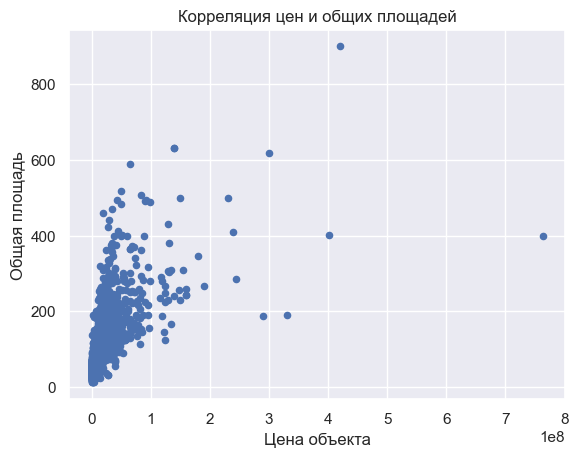

In [33]:
data.plot(x='last_price', y='total_area', kind='scatter').set_title('Корреляция цен и общих площадей')
plt.xlabel('Цена объекта')
plt.ylabel('Общая площадь');

Действительно, в данных по квартирам содержатся большое количество выбросов с высокими ценами и площадьми, но пока не понятно, где начинаются выбросы. Взглянем на ящик с усами и числовую характеристику значений

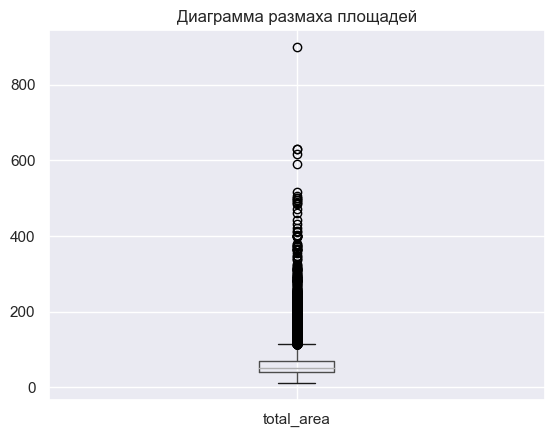

In [34]:
data.boxplot(column='total_area')
#plt.ylim(0, 900)
plt.title('Диаграмма размаха площадей');

In [35]:
data['total_area'].describe()

count    23649.000000
mean        60.327011
std         35.661158
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

И на данной диаграмме и по описанию сразу становится понятно где ориентировочная граница начала выбросов: на диаграмме она показана границей верхнего "уса" и равна 1.5 межквартильного размаха, добавленного к 3му квартилю. В нашем случае это: 
*69.7 + (69.7 - 40) * 1.5 =* **114.75** квадратных метров. Выведем для наглядности такую диаграмму

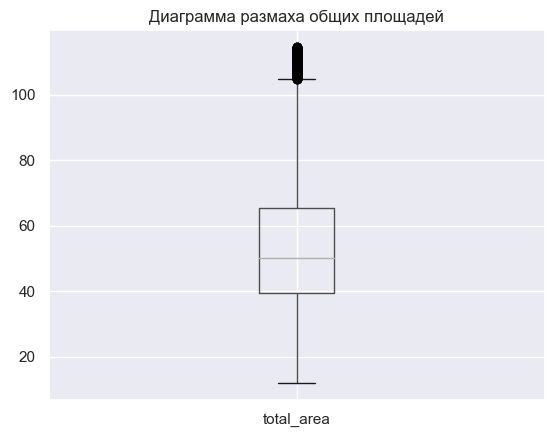

In [36]:
data.query('total_area < 114.75').boxplot(column='total_area').set_title('Диаграмма размаха общих площадей');

Над верхней границей все равно присутствуют малочисленные выбросы. Чтобы не брать их в дальнейшие рассчеты, отсечем данные, превышающие 93й процентиль (эмпирическим путем найдем более точное значение)

In [37]:
data['total_area'].quantile([0.925])

0.925    101.14
Name: total_area, dtype: float64

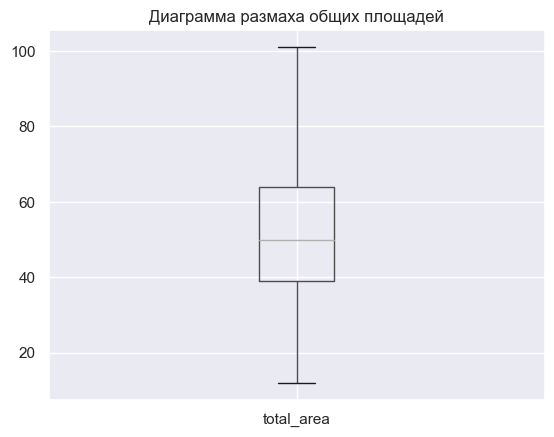

In [38]:
data.query('total_area < 101.14').boxplot(column='total_area').set_title('Диаграмма размаха общих площадей');

Значит граница нашего нормального размаха и выбросов - 101.14. Избавимся от выбросов: удалим записи, превышающие значение по площади 101.14 кв.м

In [39]:
data.drop(data.query('total_area > 101.14').index, inplace=True)
data.reset_index(drop=True, inplace=True)

И проверим на удаление таблицу

In [40]:
data.query('total_area > 101.14')

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around, parks_nearest, ponds_around, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

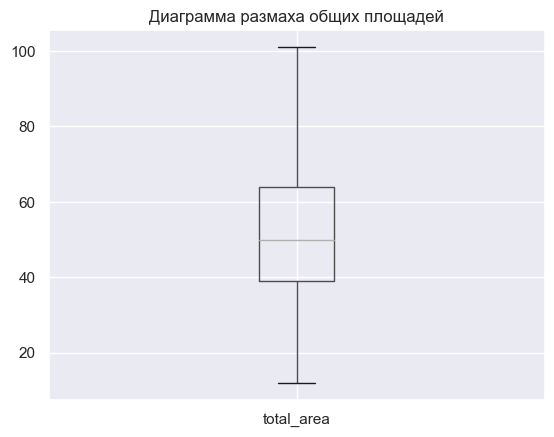

In [41]:
data.boxplot(column='total_area').set_title('Диаграмма размаха общих площадей');

In [42]:
data['total_area'].describe()

count    21875.000000
mean        53.032621
std         17.680972
min         12.000000
25%         39.000000
50%         50.000000
75%         64.000000
max        101.100000
Name: total_area, dtype: float64

In [43]:
del_value = (23649-21875)/23699*100
print(f'В итоге мы удалили {del_value:.1f} % значений и не превысили допустимый порог в 10%')

В итоге мы удалили 7.5 % значений и не превысили допустимый порог в 10%


Снова выведем диаграмму рассеяния

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


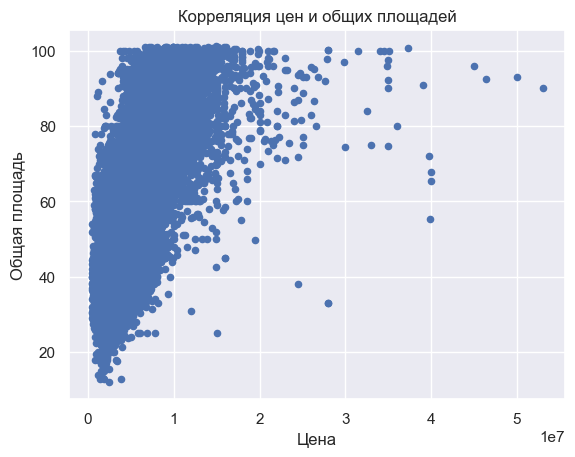

In [44]:
data.plot(x='last_price', y='total_area', kind='scatter').set_title('Корреляция цен и общих площадей')
plt.xlabel('Цена')
plt.ylabel('Общая площадь');


Выглядит намного лучше. Теперь видна прямая зависимость и по этим обработанным данным будет качественней совершать дальнейший анализ

___
---


Теперь обратимся к столбцу с высотами потолков. Найдем все уникальные значения этой графы

In [45]:
data['ceiling_height'].describe()

count    13281.000000
mean         2.740852
std          1.308081
min          1.000000
25%          2.500000
50%          2.600000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21875 entries, 0 to 21874
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21875 non-null  int64  
 1   last_price            21875 non-null  float64
 2   total_area            21875 non-null  float64
 3   first_day_exposition  21875 non-null  object 
 4   rooms                 21679 non-null  float64
 5   ceiling_height        13281 non-null  float64
 6   floors_total          21799 non-null  float64
 7   living_area           20154 non-null  float64
 8   floor                 21875 non-null  int64  
 9   is_apartment          2535 non-null   object 
 10  studio                21875 non-null  bool   
 11  open_plan             21875 non-null  bool   
 12  kitchen_area          19768 non-null  float64
 13  balcony               21875 non-null  float64
 14  locality_name         21875 non-null  object 
 15  airports_nearest   

In [47]:
sorted(data['ceiling_height'].unique())

[nan,
 1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.7,
 3.75,
 3.78,
 3.8,
 3.83,
 3.84,
 3.85,
 3.88,
 3.9,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.15,
 4.19,
 4.2,
 4.25,
 4.3,
 4.37,
 4.5,
 4.7,
 4.8,


Минимальная высота потолков в квартирах должна быть 2,5м. Если взглянуть на характеристики случайно взятых квартир с потолками ниже 2.5м, то можем увидеть многоэтажные жилые дома, которые не могут иметь несоответствующую СНИПу высоту потолка.

In [48]:
data\
    .query('ceiling_height < 2.5')[['ceiling_height', 'total_area', 'floors_total', 'floor']]\
    .sample(10)\
    .sort_values('floor', ascending=False)

ceiling_height  total_area  floors_total  floor
176              2.47        83.8           9.0      9
7198             2.45        36.0          11.0      7
10951            2.40        60.0          12.0      6
977              2.45        59.5           9.0      6
9331             2.48        42.9           5.0      5
5119             2.40        46.2           9.0      4
18550            2.40        53.0           5.0      3
6724             2.40        51.7           6.0      3
14725            2.40        44.2           5.0      2
11139            2.40        56.3           5.0      1

Но высоту потолка ниже 2.5м могут иметь апартаменты. Из-за неполноты данных мы не можем быть в этом уверенны. Таких значений мало, но такие малые значения могут исказить среднее. Следует удалить их. Определимся с граничным значением: выведем значения до 2.5м

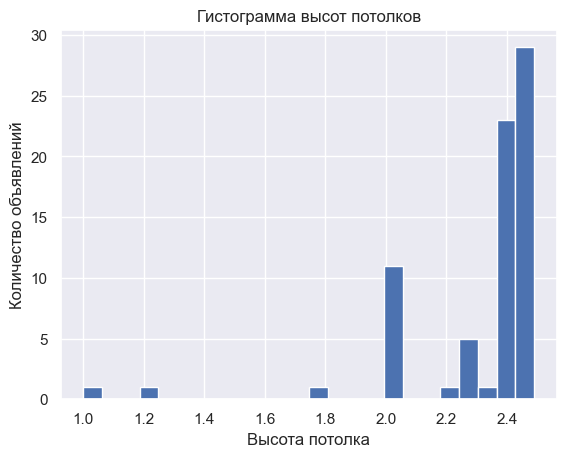

In [49]:
data[data['ceiling_height'] < 2.5]['ceiling_height'].hist(bins=24).set_title('Гистограмма высот потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество объявлений');

Приблизим гистограмму к интервалу от 2.2 до 2.4 включительно

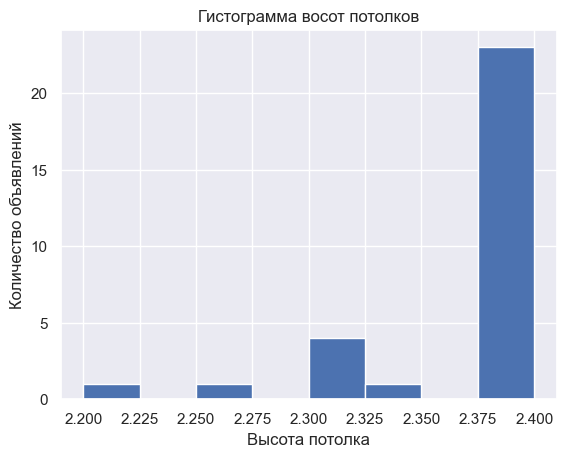

In [50]:
data[(data['ceiling_height'] <= 2.4) & (data['ceiling_height'] >= 2.2)]['ceiling_height']\
    .hist(bins=8).set_title('Гистограмма восот потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество объявлений');

Мы бы могли привести слишком низкие значения к стандартному, но во-первых мы не уверены в не истинности этих значений, во-вторых присвоить им строго одно значение будет неправильно. Поэтому отсечем значения в этих колонках ниже 2.35м и далее не будем включать их в выборку. Удалять целиком эти объявления не будем, потому что нам понадобятся другие данные из них в анализе.

In [51]:
data.loc[(data['ceiling_height'] < 2.35), 'ceiling_height'] = np.nan

Проверим уникальные значения теперь

In [52]:
sorted(data['ceiling_height'].unique())

[nan,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.7,
 3.75,
 3.78,
 3.8,
 3.83,
 3.84,
 3.85,
 3.88,
 3.9,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.15,
 4.19,
 4.2,
 4.25,
 4.3,
 4.37,
 4.5,
 4.7,
 4.8,
 5.0,
 5.3,
 5.8,
 8.0,
 8.3,
 10.3,
 14.0,
 20.0,


---
Теперь разберемся с высотами потолков выше 3.2м

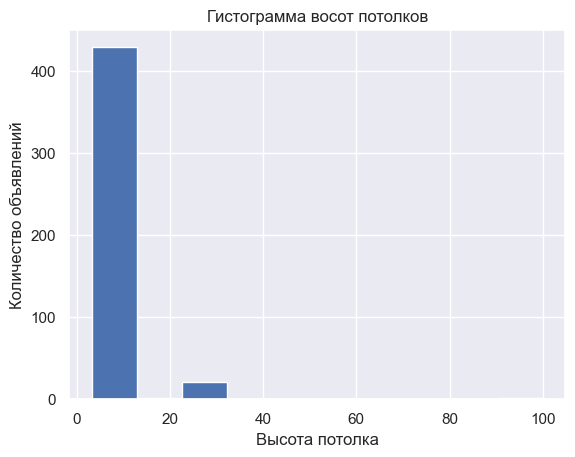

In [53]:
data.query('ceiling_height > 3.2')['ceiling_height'].hist().set_title('Гистограмма восот потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество объявлений');

На гистограмме видны две выборки. Разберемся с левой и правой частью гистограммы: разделим их на участки *от 3.2 до 6.5 м* и *от 6.5 и выше*. Начнем с левой части

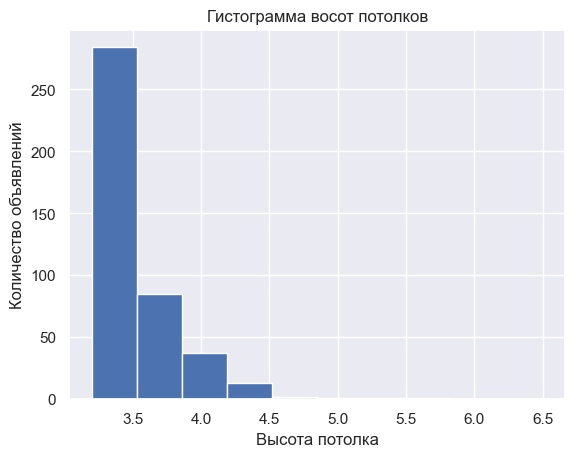

In [54]:
data.query('ceiling_height > 3.2')['ceiling_height'].hist(range=(3.2, 6.5)).set_title('Гистограмма восот потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество объявлений');

Заметен пик на 3.2м, далее идет спад, а после 4.5м очень мало значений. Взглянем на правую часть диаграммы

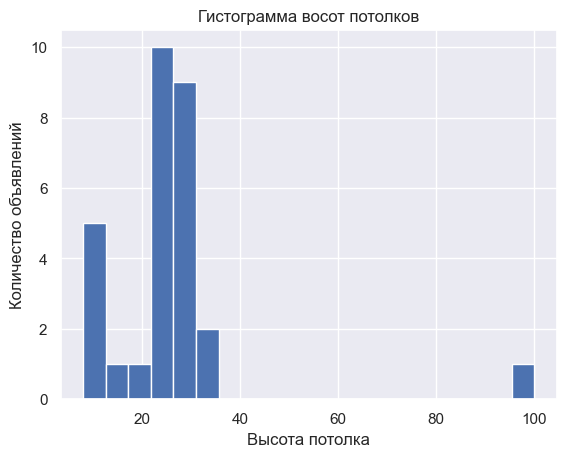

In [55]:
data.query('ceiling_height > 6.5')['ceiling_height'].hist(bins=20).set_title('Гистограмма восот потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество объявлений');

Виден пик на значениях 25-26м. Можно сделать предположение, что из-за технической проблемы или человеческого фактора была потеряна запятая у значений выше 25м. Исправим это: разделим значения выше 25м на 10, а значения между 4.5 и 25 удалим, т.к. мы не можем быть уверены в таких больших значениях и их количетво очень мало, чтобы делать какие-то выводы, зато своими номиналами они могут искажать общую картину

In [56]:
data[data['ceiling_height'] >= 25]['ceiling_height'].apply(lambda x: x / 10)

323       2.50
2890      3.20
4284      2.50
4501      2.70
4841      2.70
5240      2.60
5369      2.70
5777      2.50
8668      2.50
9946      2.70
10426     2.50
13281     2.50
16507     2.70
17134     2.50
18910     2.70
19738     2.75
20149     2.70
20618     3.20
21108    10.00
21173     2.70
Name: ceiling_height, dtype: float64

Проверим удаление

In [57]:
data.loc[(data['ceiling_height'] > 4.5)] = np.nan

data[(data['ceiling_height'] > 4.5)]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around, parks_nearest, ponds_around, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

Выведем гистограмму по обработанным данным 

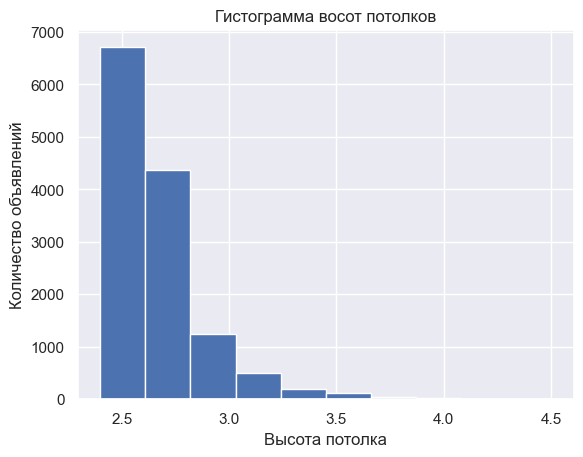

In [58]:
data['ceiling_height'].hist().set_title('Гистограмма восот потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество объявлений');

Стало выглядеть более правдоподобно

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21875 entries, 0 to 21874
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21841 non-null  float64
 1   last_price            21841 non-null  float64
 2   total_area            21841 non-null  float64
 3   first_day_exposition  21841 non-null  object 
 4   rooms                 21647 non-null  float64
 5   ceiling_height        13226 non-null  float64
 6   floors_total          21765 non-null  float64
 7   living_area           20122 non-null  float64
 8   floor                 21841 non-null  float64
 9   is_apartment          2521 non-null   object 
 10  studio                21841 non-null  object 
 11  open_plan             21841 non-null  object 
 12  kitchen_area          19743 non-null  float64
 13  balcony               21841 non-null  float64
 14  locality_name         21841 non-null  object 
 15  airports_nearest   

In [60]:
del_value = (23699-21841)/23699*100
print(f'В итоге мы удалили {del_value:.1f} % значений и не превысили допустимый порог в 10%')

В итоге мы удалили 7.8 % значений и не превысили допустимый порог в 10%


___
---

Обратимся теперь к гистограмме количества дней, которое объявления были размещены

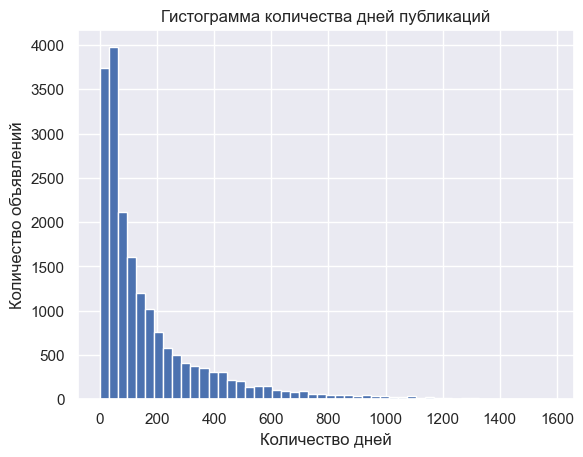

In [61]:
data['days_exposition'].hist(bins=50).set_title('Гистограмма количества дней публикаций')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений');

Большинство объявлений закрываются в первые полгода. Но, согласно гистограмме, есть и те, которые не закрываются и после трех лет. Обратимся снова к диаграмме размаха и выведем характеристики данных для более детального ознакомления.

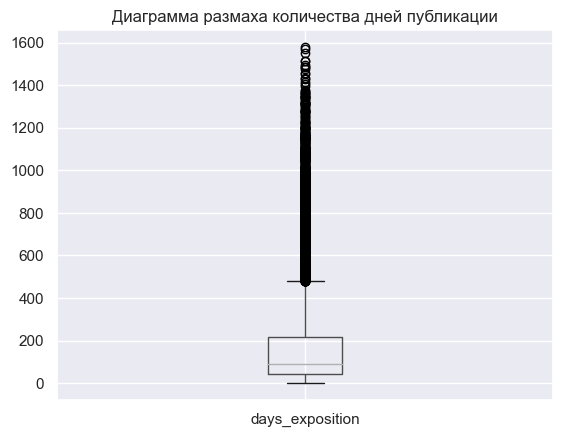

In [62]:
data.boxplot(column='days_exposition')
plt.title('Диаграмма размаха количества дней публикации');

In [63]:
data['days_exposition'].describe().round()

count    19099.0
mean       173.0
std        211.0
min          1.0
25%         44.0
50%         91.0
75%        218.0
max       1580.0
Name: days_exposition, dtype: float64

Минимальный срок размещения - 1 день, а максимальный 1580! 

Возможно такие большие значения возникли по причине того, что объявления могли быть по ошибке не закрыта, или они могли быть фальшивыми, либо заявленные в объявлениях данные могли быть некорректными и такие объекты долго не покупали.

<a class="anchor" id="count_and_add_columns"></a>
### 3. Посчитаем и добавим в таблицу новые столбцы

<a class="anchor" id="search_type_errors"></a>
#### 3.1. Найдем столбцы, в которых нужно изменить тип данных, и преобразуем их

Мы заметили, что в колонке с продолжительностью размещения данные имеют вещественный тип, а дни должны измеряться целыми числами. Изменим его на целочисленный

In [64]:
data['days_exposition'] = round(data['days_exposition']).astype('Int64')

И проверим его тип

In [65]:
data['days_exposition'].dtype

Int64Dtype()

___

Выбивающийся столбец - с датой. Превратим содержимое этого столбца в понятные для Python даты. Это поможет применять методы с датой и упрощает понимание

In [66]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S'
)

In [67]:
#data['first_day_exposition'].dtype
data.sample(5)

total_images  last_price  total_area first_day_exposition  rooms  \
17548           2.0   4200000.0        36.0           2017-12-16    1.0   
21492          14.0   5600000.0        50.0           2017-11-14    2.0   
19785          14.0  10700000.0        65.0           2018-11-30    2.0   
9010            5.0   2800000.0        41.0           2019-03-26    1.0   
19053          11.0   4900000.0        39.0           2019-04-22    1.0   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
17548             NaN          25.0          NaN   13.0          NaN  ...   
21492            2.70          14.0         24.8    6.0          NaN  ...   
19785            3.10          15.0         34.0   13.0          NaN  ...   
9010             2.55          10.0         18.8    4.0          NaN  ...   
19053            2.65          10.0         19.0    4.0          NaN  ...   

      kitchen_area balcony            locality_name  airports_nearest  \
17548          NaN     0.0          Санкт-Петербург           36231.0   
21492         11.1     1.0          Санкт-Петербург           14762.0   
19785          NaN     5.0          Санкт-Петербург           35596.0   
9010          11.0     0.0  поселок имени Свердлова               NaN   
19053         11.0     0.0          Санкт-Петербург           35443.0   

      city_centers_nearest  parks_around  parks_nearest  ponds_around  \
17548              17394.0           0.0            NaN           1.0   
21492              13558.0           0.0            NaN           0.0   
19785              14887.0           0.0            NaN           0.0   
9010                   NaN           0.0            NaN           0.0   
19053              15744.0           0.0            NaN           3.0   

       ponds_nearest  days_exposition  
17548          870.0               37  
21492            NaN              215  
19785            NaN             <NA>  
9010             NaN                8  
19053          555.0             <NA>  

[5 rows x 22 columns]

<a class="anchor" id="add_columns"></a>
#### 3.2. Добавим в таблицу новые столбцы

In [68]:
data.sample(5)

total_images  last_price  total_area first_day_exposition  rooms  \
19360          10.0   5000000.0        70.0           2016-07-13    3.0   
2396           10.0  10000000.0        68.5           2017-04-21    3.0   
9650           12.0   4750000.0        33.6           2016-06-14    1.0   
17769           2.0   3600000.0        41.5           2017-04-08    1.0   
3901           15.0   9000000.0        57.8           2019-04-03    2.0   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
19360             NaN          12.0         45.0    4.0          NaN  ...   
2396              NaN           6.0         44.8    1.0          NaN  ...   
9650             2.75          15.0         16.9   10.0          NaN  ...   
17769             NaN          25.0         19.0   15.0          NaN  ...   
3901             3.10           7.0         37.3    7.0          NaN  ...   

      kitchen_area balcony    locality_name  airports_nearest  \
19360          9.0     0.0  Санкт-Петербург           14235.0   
2396           7.7     0.0  Санкт-Петербург           23553.0   
9650           8.4     0.0  Санкт-Петербург           27573.0   
17769         13.0     2.0  деревня Кудрово               NaN   
3901           8.3     0.0  Санкт-Петербург           11601.0   

      city_centers_nearest  parks_around  parks_nearest  ponds_around  \
19360              13031.0           0.0            NaN           0.0   
2396                1862.0           3.0          286.0           3.0   
9650                9436.0           1.0          714.0           0.0   
17769                  NaN           0.0            NaN           0.0   
3901                8504.0           1.0          359.0           3.0   

       ponds_nearest  days_exposition  
19360            NaN              483  
2396           577.0               90  
9650             NaN             1015  
17769            NaN              158  
3901           617.0                5  

[5 rows x 22 columns]

**Столбец с ценой за один квадратный метр**

In [69]:
data['price_of_square'] = (data['last_price'] / data['total_area']).round(1)

**День недели публикации объявления**

In [70]:
data['week_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

**Месяц публикации объявления**

In [71]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

**Год публикации объявления**

In [72]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

**Тип этажа квартиры**

In [73]:
for x in range(len(data['floor'])):
    if data.loc[x, 'floor'] == data.loc[x, 'floors_total']:
        data.loc[x, 'floor_type'] = 'последний'
    elif data.loc[x, 'floor'] == 1:
        data.loc[x, 'floor_type'] = 'первый'
    elif data.loc[x, 'floor'] > 0:
        data.loc[x, 'floor_type'] = 'другой'

In [74]:
data[['floor', 'floors_total', 'floor_type']].sample(10)

floor  floors_total floor_type
8154     1.0           5.0     первый
19285    3.0          16.0     другой
632      2.0          20.0     другой
3557     3.0           4.0     другой
12308    7.0          14.0     другой
21664   13.0          22.0     другой
10233    9.0           9.0  последний
6484     6.0           9.0     другой
11693   16.0          20.0     другой
20708    5.0           5.0  последний

**Расстояние до центра города в километрах**

In [75]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

In [76]:
data.loc[:, ['city_centers_nearest_km', 'city_centers_nearest']]

city_centers_nearest_km  city_centers_nearest
0                         19.0               18603.0
1                         14.0               13933.0
2                          8.0                8098.0
3                          NaN                   NaN
4                         19.0               19143.0
...                        ...                   ...
21870                     34.0               34104.0
21871                      NaN                   NaN
21872                      NaN                   NaN
21873                     10.0               10364.0
21874                      NaN                   NaN

[21875 rows x 2 columns]

<a class="anchor" id="eda"></a>
### 4. Проведем исследовательский анализ данных

<a class="anchor" id="study_param"></a>
#### 4.1. Изучим некоторые параметры объектов:

**Общая площадь**

Для визуализации распределения количества квартир с разной общей площадью построим гистограмму с линией тренда

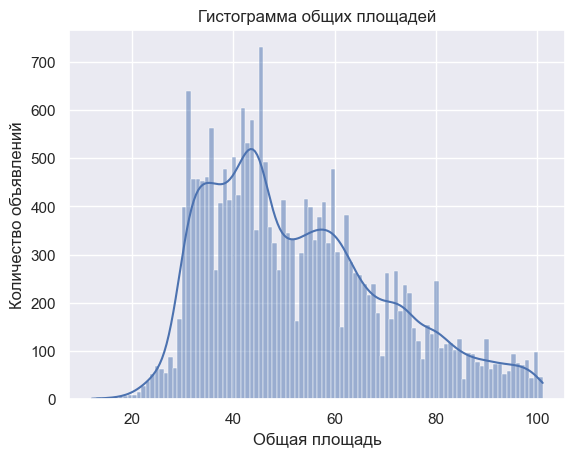

In [77]:
sns.histplot(data=data, x='total_area', kde=True, bins=100).set_title('Гистограмма общих площадей')
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений');

График не очень информативен. Понятно лишь, что значения площадей лежат в диапазоне примерно от 10 кв.м. до 100 кв.м. и наиболее часто встречающаяся квартира - с площадью около 45 кв.м. Также тренд показывает неравномерность распределения. Для большей информативности построим ящик с усами и выведем его числовые характеристики.

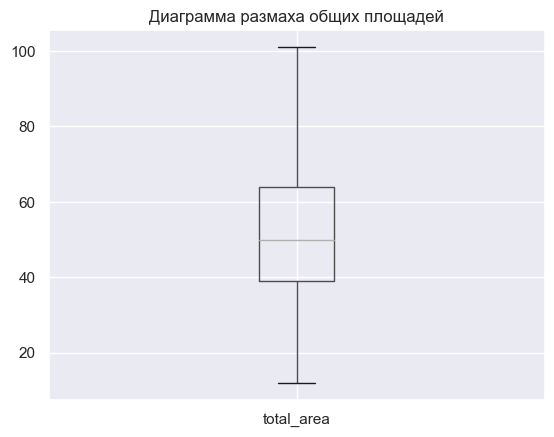

In [78]:
data.boxplot(column='total_area').set_title('Диаграмма размаха общих площадей');

In [79]:
data['total_area'].describe()

count    21841.000000
mean        53.032099
std         17.678230
min         12.000000
25%         39.000000
50%         50.000000
75%         64.000000
max        101.100000
Name: total_area, dtype: float64

Подведем итоги: на рынке недвижимости имеются квартиры с площадьми от 12 до 101 кв.м., но самые часто встречающиеся - это квартиры с площадьми от 38 до 60 кв.м., а среднее значение - 50 кв.м. Также площади распределены неравномерно: наблюдаются пики на значениях около 35, 43, 58, 73 и в районе 80 кв.м. Вероятно это связано с количеством комнат в соответствующих площадям квартирах. Проверим это: построим диаграммы распределения площадей, сегментированные по количеству комнат, и посмотрим на средние значения и разброс значений в них.

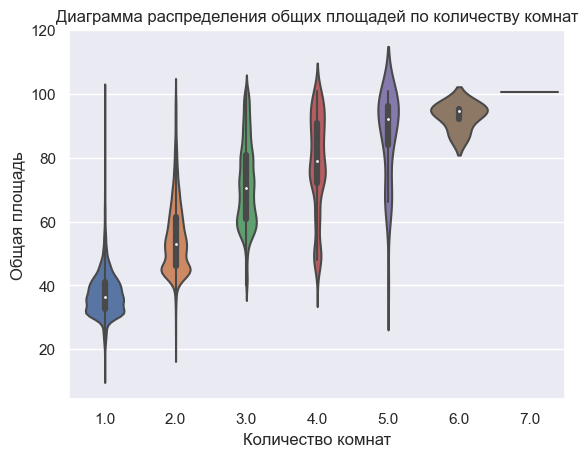

In [80]:
sns.violinplot(x="rooms", y="total_area", data=data).set_title('Диаграмма распределения общих площадей по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Общая площадь');

График подтверждает наше предположение: разброс значений для каждого графика совпадает с выраженными значениями на графике распределения площадей, значит скачки на графике площадей квартир обусловален количеством комнат в этих самих квартирах. 

**Жилая площадь**

Аналогично выведем гистограмму и ящик с усами с числовыми характеристиками для жилых площадей 

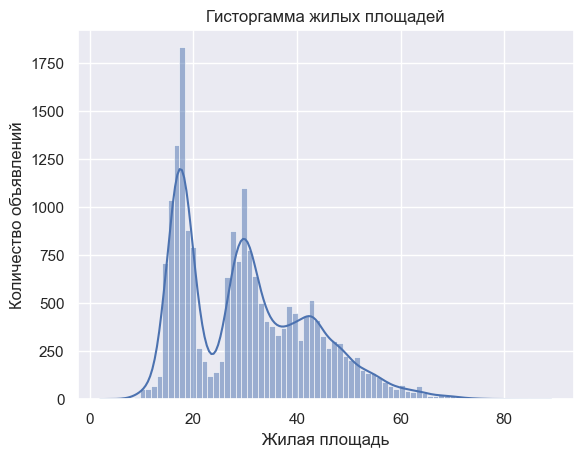

In [81]:
sns.histplot(data=data, x='living_area', kde=True, bins=80).set_title('Гисторгамма жилых площадей')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений');

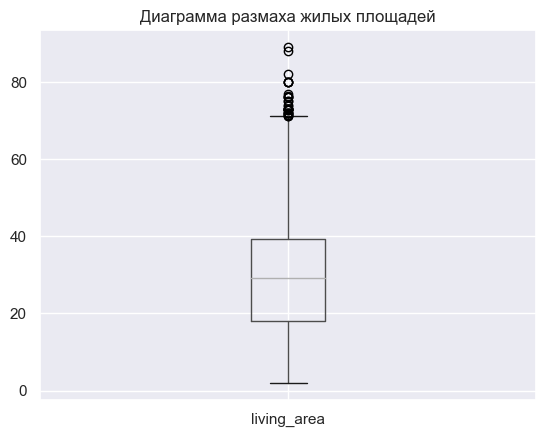

In [82]:
data.boxplot(column='living_area').set_title('Диаграмма размаха жилых площадей');

In [83]:
data['living_area'].describe()

count    20122.000000
mean        30.282099
std         12.554344
min          2.000000
25%         18.100000
50%         29.300000
75%         39.300000
max         89.100006
Name: living_area, dtype: float64

Во-первых: диапазон площадей принимает значения от 2 и до 89 кв.м. Наиболее часто встречающиеся квртиры с жилыми площадьми от 18 до 39 кв.м. и с медианным средним значением - 29 кв.м. 

Во-вторых: аналогично гистограмме распределения общих площадей мы видим неравномерность распределения с явно выражеными пиками значений на отметках приблизительно 17, 30, 44  и 65 кв.м. Вероятней всего здесь прямая зависимость жилой площади с количестом комнат в квартире. Проверим эту теорию: построим диаграмму рассеяния и раскрасим разными цветами квартиры с разным количеством комнат.

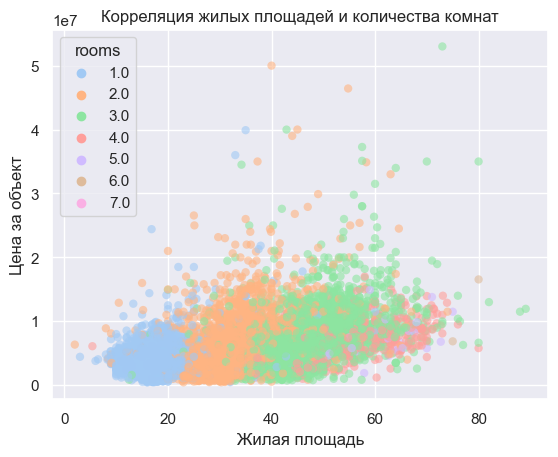

In [84]:
colors = sns.color_palette("pastel")[:data.rooms.nunique()]
sns.scatterplot(x="living_area", y="last_price",
hue="rooms",
palette=colors,
linewidth=0, alpha=0.6,
data=data).set_title('Корреляция жилых площадей и количества комнат')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена за объект');

График показывает, что этим значениям (17, 30, 44 и 65 кв.м.) соответствуют типичные с данным количеством комнат квартиры. Значит наша теория подтвердилась: пики линии тренда на гистограмме жилых площадей обусловлены количеством комнат для данных типичных площадей. Из этого следует логичный вывод: жилая площадь зависит от количества комнат в квартире.

**Площадь кухни**

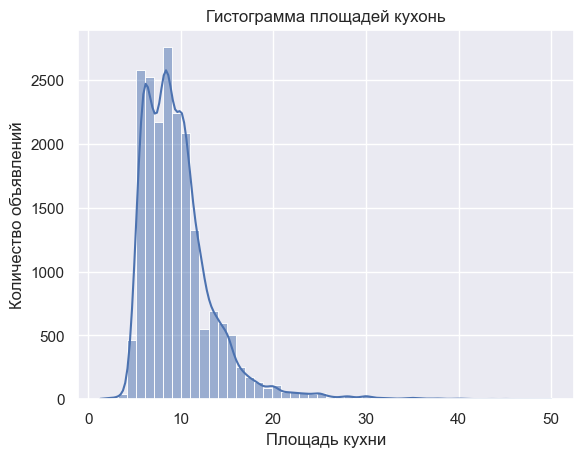

In [85]:
sns.histplot(data=data, x='kitchen_area', kde=True, bins=50).set_title('Гистограмма площадей кухонь')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений');

In [86]:
data['kitchen_area'].describe()

count    19743.000000
mean         9.727992
std          4.057669
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64

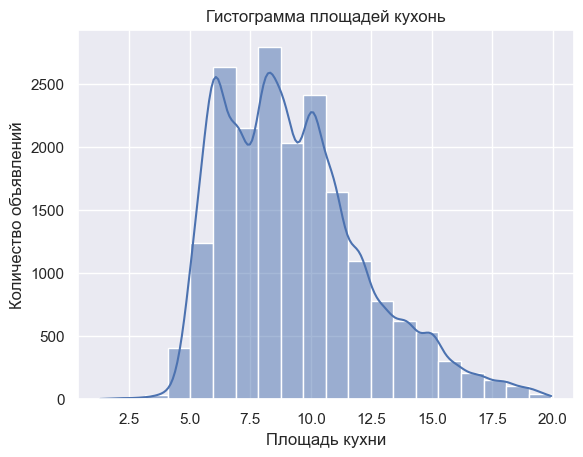

In [87]:
sns.histplot(data=data.query('kitchen_area < 20'), x='kitchen_area', kde=True, bins=20).set_title('Гистограмма площадей кухонь')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений');

Наиболее распространенные площади кухонь: от 7 до 11 кв.м., среднее значение - 9 кв.м. На графике после 20 кв.м. простилается длинный хвост аж до 50 кв.м. Скорее всего в такую выборку входят многокомнатные квартиры с большой общей площадью, квартиры с свободной планировкой, либо апартаменты.
Также имеются квартиры с площадьми кухонь 1.3 кв.м. Сюда, вероятно, входят квартиры с малым количеством комнат и малой общей площадью.

*Взглянем на показатели квартир с крупными кухнями*

In [88]:
(data
    .sort_values('kitchen_area', ascending=False)\
         [['total_area', 'kitchen_area', 'rooms', 'is_apartment']]
    .head(7))

total_area  kitchen_area  rooms is_apartment
467          69.0          50.0    1.0          NaN
19695        93.4          49.4    3.0          NaN
18731        86.3          48.3    2.0          NaN
10784        93.0          47.0    2.0          NaN
6178         93.0          46.8    3.0          NaN
15784        92.7          45.0    2.0        False
4891         96.0          45.0    2.0         True

*и с маленькими соответственно*

In [89]:
(data
    .sort_values('kitchen_area')[['total_area', 'kitchen_area', 'rooms', 'is_apartment']]
    .head(7))

total_area  kitchen_area  rooms is_apartment
18668       28.50           1.3    1.0          NaN
10192       32.00           2.0    1.0          NaN
5791        24.00           2.0    2.0          NaN
15129       25.70           2.0    1.0          NaN
815         27.00           2.0    1.0          NaN
8440        23.29           2.0    1.0          NaN
18139       14.00           2.0    1.0          NaN

Видим очевидную закономернось: маленькие кухни соответствуют, как правило, однокомнатным квартирам с маленькой общей площадью, а большие кухни наоборот - 2х и более комнатным квартирам с большой площадью. Теорию с апартаментами мы проверить не сможем: слишком много пропущенных значений.

**Цена объекта**

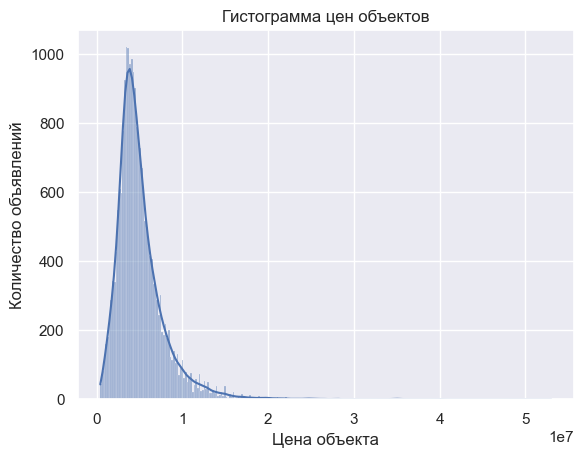

In [90]:
sns.histplot(data=data, x='last_price', kde=True).set_title('Гистограмма цен объектов')
plt.xlabel('Цена объекта')
plt.ylabel('Количество объявлений');

In [91]:
data['last_price'].describe()

count    2.184100e+04
mean     5.106457e+06
std      3.013532e+06
min      4.300000e+05
25%      3.330000e+06
50%      4.450000e+06
75%      6.100000e+06
max      5.300000e+07
Name: last_price, dtype: float64

Цены на квартиры расстилаются в диапазоне от *430 000 руб.* до *53 000 000 руб.* Распределение цен довольно равномерное: наиболее популярны квартиры со средней ценой (в районе 4.5 млн. руб.). Это очевидно: дешевые квартиры вызывают малый интерес всвязи с худшими условиями и факторами, которые эту самую цену и снижают, а дорогие не популярны из-за своей высокой цены и, как следствие, малой доступности. О зависимости цены от различных факторов поговорим чуть позднее.

**Количество комнат**

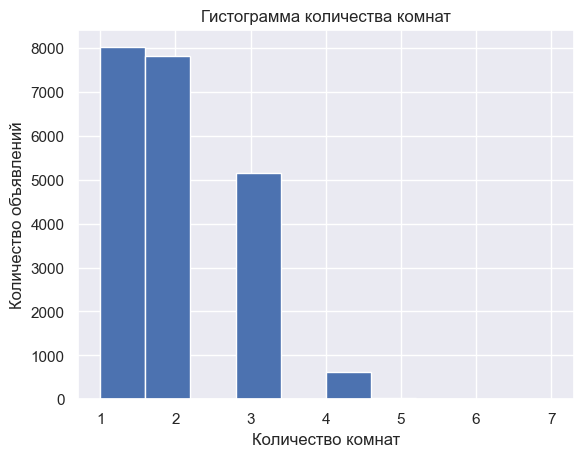

In [92]:
data['rooms'].hist().set_title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений');

Самые популярные однокомнатные и двухкомнатные квартиры. Где-то в 2 раза, по сравнению с однушками, менее популярны трехкомнатные. А четырех и более комнатные квартиры составляют очень малую часть от всех. Это объяснимо: для одиноких людей и не очень больших семей многоквартирная недвижимость не практична, к тому же она более дорогая и менее доступна. А вот квартиры с одной или двумя комнатами - наоборот: они подходят большинству семей и одиноких, к тому же такие квартиры более рентабельны для сдачи в аренду. Трехкомнатные же выбирают, как правило, крупные семьи, и такая недвижимость все еще востребована, хоть и не так сильно, как однокомнатные и двухкомнатные.

**Высота потолков**

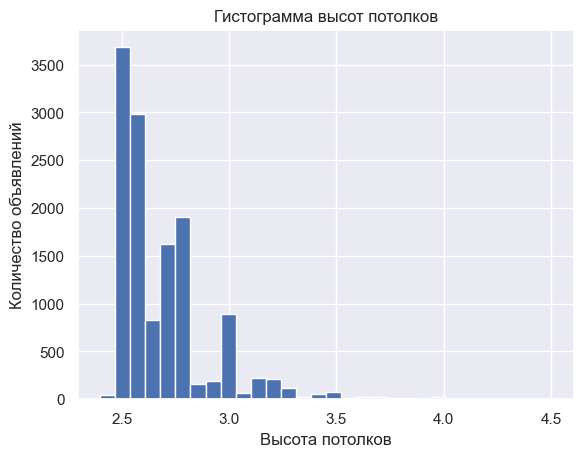

In [93]:
data['ceiling_height'].hist(bins=30).set_title('Гистограмма высот потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений');

In [94]:
data.value_counts('ceiling_height').head(5)

ceiling_height
2.50    3489
2.60    1622
2.70    1504
2.55     969
2.80     904
dtype: int64

Самая распространенная высота потолков: 2.5 - 2.8 м. Это объясняется минимальными строительными требованиями, а также практичностью (например: чем больше обьем комнат, тем сложнее их прогреть Питерской зимой). Люди, заполняющие данные по своей квартире, могут не знать либо неверно оценить высоту потолка, поэтому подробно и точно рассматривать эту метрику не будем. 

**Этаж квартиры**

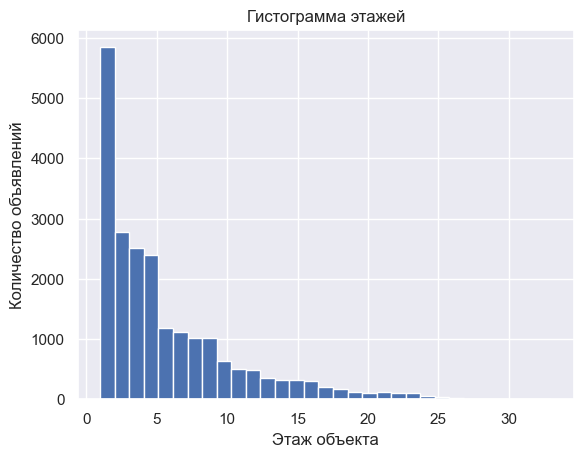

In [95]:
data['floor'].hist(bins=31).set_title('Гистограмма этажей')
plt.xlabel('Этаж объекта')
plt.ylabel('Количество объявлений');

In [96]:
data.value_counts('floor').head(7)

floor
2.0    3056
1.0    2787
3.0    2774
4.0    2511
5.0    2396
6.0    1186
7.0    1121
dtype: int64

Подавляющее большинство квартрир продается с 1 по 5 этаж. В городе и пригороде очень много старых и советских домов, которые имеют небольшое количество этажей. Как мы чуть позже узнаем, подавляющее большинство домов в Санкт-Петербурге и области имеют 5 этажей, а на 2м месте по популянрности - 9 этажей. Поэтому чем выше этаж мы ищем, тем меньше объявлений мы найдем: высоких этажей в Питере совсем немного, а вероятность найти в таких домах предложения по прадаже квартиры и того меньше.

**Тип этажа**

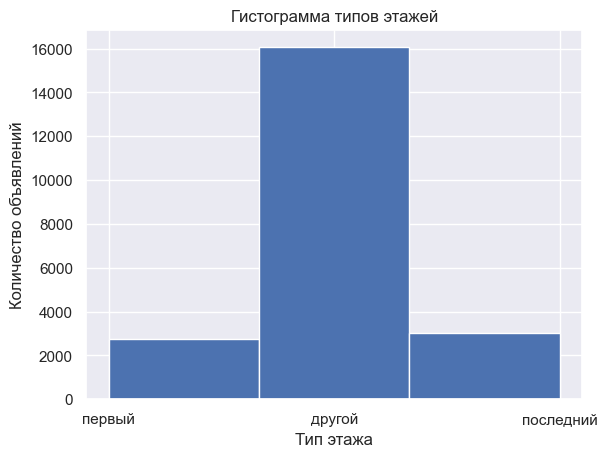

In [97]:
data['floor_type'].hist(bins=3).set_title('Гистограмма типов этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений');

In [98]:
data.query('floor_type == "другой"')['floor_type'].count()/len(data['floor_type'])

0.7342628571428571

На рынке недвижимости квартир на первом этаже примерно столько же, сколько на последнем, и их доля в среднем по 13%. Остальные 73% занимают квартиры, отличные от первых и послених этажей, скорее всего потому что их фактически многокрано больше, чем первых и последних.

**Общее количество этажей в доме**

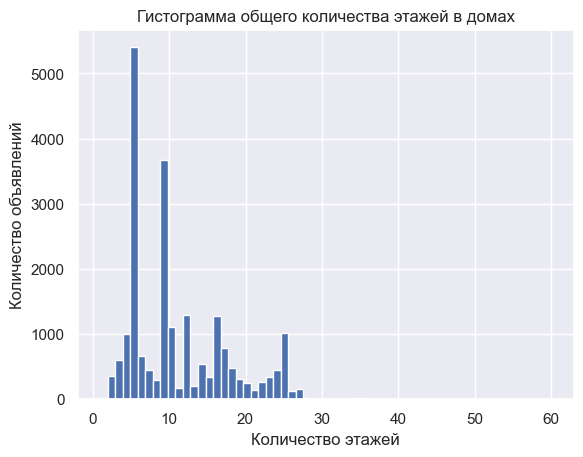

In [99]:
data['floors_total'].hist(bins=60).set_title('Гистограмма общего количества этажей в домах')
plt.xlabel('Количество этажей')
plt.ylabel('Количество объявлений');

In [100]:
data.value_counts('floors_total').head(7)

floors_total
5.0     5401
9.0     3676
12.0    1297
16.0    1271
10.0    1106
25.0    1013
4.0     1005
dtype: int64

Подавляющее большинство домов в Санкт-Петербурге и области имеют 5 этажей, а на 2м месте по популянрности - 9 этажей. Возможно это связано с большим возрастом города, когда высокие дома не строили в принципе, а также с модой в советские времена строить именно 5ти и 9ти этажки. Остальных домов многократно меньше, потому что новые относительно высокие дома не успели количественно превзойти столетние постройки.

**Расстояние до центра города в метрах**

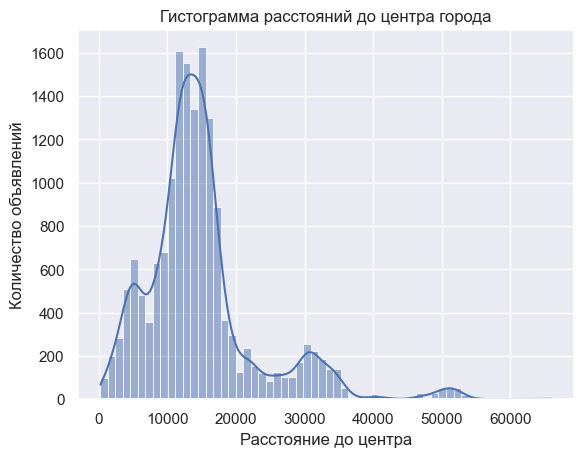

In [101]:
sns.histplot(data=data, x='city_centers_nearest', kde=True, bins=60).set_title('Гистограмма расстояний до центра города')
plt.xlabel('Расстояние до центра')
plt.ylabel('Количество объявлений');

Рассмотрим населенные пункты по удаленности от центра и по выдающимя значениям количества объявлений (более 80), т.к. такие населенные пункты, вероятней всего, отличаются спросом из-за развитой инфраструктуры и комфортного жилья.

In [102]:
# группируем по населенным пунктам, агрегируем по медиане расстояния до центра и количеству объявлений
city_centers_group = (data
                  .groupby('locality_name').agg({'city_centers_nearest': ['median', 'count']}).round())
# переименовываем двухэтажные столбцы в обычные
city_centers_group.columns=['median', 'count']
# добавляем столбец с долей объявлений от общего их количества
city_centers_group['share'] = (city_centers_group['count']/city_centers_group['count'].sum()).round(2)
# сортируем по удаленности от центра в порядке возрастания
city_centers_group = city_centers_group.sort_values(by='median', ascending=True)

In [103]:
city_centers_group.query('median < 19000')

median  count  share
locality_name                         
Санкт-Петербург  12622.0  14028   0.85

Подавляющая масса объявлений - по городу Санкт-Петербург (84% от всех объявлений), поэтому мы видим огромный пик на отметках от *0* до, приблизительно, *19 000м* до центра города.

In [104]:
city_centers_group.query('(median>19000) & (median<27000)')

median  count  share
locality_name                           
поселок Парголово  19311.0    325   0.02
поселок Мурино     21888.0      2   0.00
поселок Стрельна   23491.0     41   0.00
поселок Шушары     24211.0    428   0.03
поселок Левашово   25727.0      1   0.00
поселок Песочный   26100.0      4   0.00

Следующие по удаленности и количеству объявлений находятся поселок Парголово и поселок Шушары, находящиеся в среднем на расстояниий от *19 000* до *24 000м* и занимающие в сумме 5% от всех объявлений.

In [105]:
city_centers_group.query('(median>27000) & (median<40000)')

median  count  share
locality_name                                 
поселок Петро-Славянка   27165.0      1   0.00
поселок Александровская  27352.0      1   0.00
поселок Металлострой     27585.0     65   0.00
Пушкин                   27941.0    339   0.02
поселок Усть-Ижора       28222.0      2   0.00
поселок Лисий Нос        28226.0      3   0.00
Красное Село             29139.0    171   0.01
Колпино                  32018.0    331   0.02
поселок Понтонный        32354.0     20   0.00
Павловск                 32683.0     36   0.00
Петергоф                 33771.0    196   0.01
поселок Щеглово          34085.0      1   0.00
Сестрорецк               34775.0    166   0.01
поселок Саперный         35860.0      6   0.00
поселок Белоостров       38868.0      1   0.00

Следующий по величине пик на отметке от *28 000* до *35000м* состоит из нескольких населенных пунктов: Пушкин, Красное Село, Колпиново, Петергов. Сестрорецк и еще нескольких небольших пунктов, всего в сумме около 7% от общего количества. 

In [106]:
city_centers_group.query('(median>40000) & (median<60000)')

median  count  share
locality_name                        
поселок Репино  44218.0      2   0.00
Кронштадт       49570.0     90   0.01
Ломоносов       51629.0    127   0.01
Зеленогорск     53379.0     23   0.00

И крайние по удаленности находятся Кронштадт и Ломоносов на расстоянии около *50 000м* от центра города и занимают 2% от всех объявлений.

**Расстояние до ближайшего аэропорта**

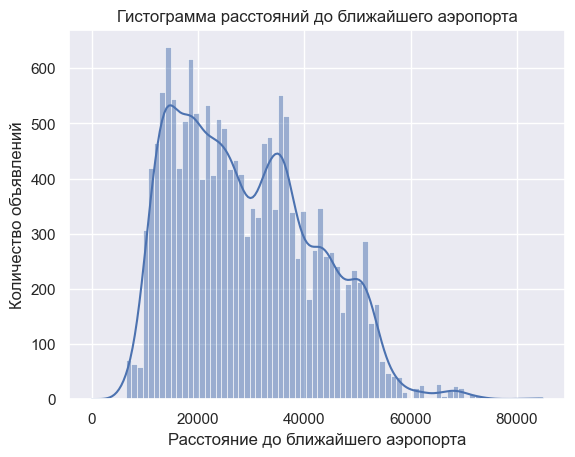

In [107]:
sns.histplot(data=data, x='airports_nearest', kde=True, bins=80).set_title('Гистограмма расстояний до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество объявлений');

Рассмотрим самые близлежащие к аэропорту крупные (более 80 объявлений) населенные пункты и самые отдаленные

In [108]:
airport_group = data.groupby('locality_name').agg({'airports_nearest': ['median', 'count']})
airport_group.columns = ['median', 'count']

In [109]:
airport_group.sort_values(by='median').query('count > 80').head()

median  count
locality_name                  
Пушкин           15776.5    340
поселок Шушары   17352.0    428
Красное Село     25714.0    171
Колпино          26232.0    331
Санкт-Петербург  27310.0  14011

Самыа близлежащая к аэропорту пятерка крупных населенных пунктов: Пушкин - *16 000м*, поселок Шушары - *17 000м*, Красное Село - *25 700м*, Колпино - *26 000м* и завершает список Санкт-Петербург - *27 700м*

In [110]:
airport_group.sort_values(by='median', ascending=False).query('count > 80').head()

median  count
locality_name                    
Кронштадт          67844.0     90
Сестрорецк         56787.0    166
поселок Парголово  53426.0    325
Ломоносов          48393.0    127
Петергоф           39254.0    196

Пятерка самых отдаленных: Кронштадт - *68 000м*, Сестрорецк - *60 000м*, поселок Парголово - *53 000м*, Ломоносов - *48 000м* и Петергоф - *39 000м*

**Расстояние до ближайшего парка**

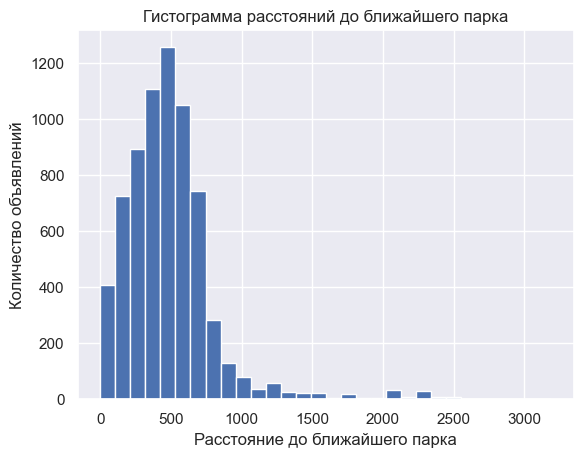

In [111]:
data['parks_nearest'].hist(bins=30).set_title('Гистограмма расстояний до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество объявлений');

Большинство населенных пунктов, как правило, имеют поблизости парк на расстоянии не дальше *1000м*

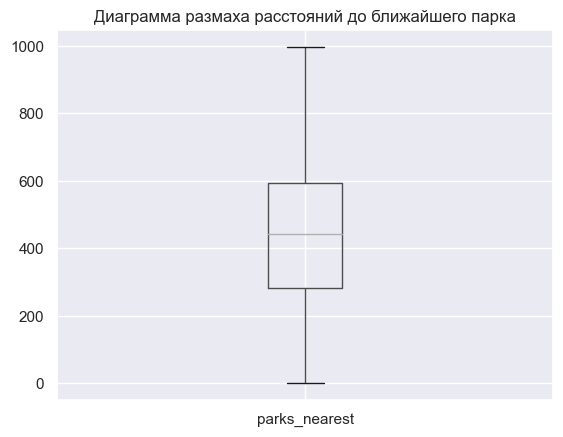

In [112]:
data.query('parks_nearest < 1000').boxplot(column='parks_nearest').set_title('Диаграмма размаха расстояний до ближайшего парка');

In [113]:
data.query('parks_nearest < 1000')['parks_nearest'].describe()

count    6640.000000
mean      438.672892
std       211.503705
min         1.000000
25%       282.000000
50%       441.000000
75%       592.000000
max       997.000000
Name: parks_nearest, dtype: float64

а если быть точнее, то в случайно выбранном населенном пункте велика вероятность, что ближайший парк будет на расстоянии от *280м* до *590м*

In [114]:
parks_group = data.groupby('locality_name').agg({'parks_nearest': ['median', 'count']})
parks_group.columns=['median', 'count']

In [115]:
parks_group.sort_values('median').head()

median  count
locality_name               
Зеленогорск     147.5     16
Петергоф        311.0    139
Кронштадт       312.0     82
Павловск        312.0     24
Сестрорецк      367.0     67

Топ 5 близких к парку населенных пунктов: Зеленогорск, Кронштадт, Петергоф, Павловск и Сестрорецк.

In [116]:
parks_group.sort_values('median', ascending=False).head()

median  count
locality_name                   
поселок Парголово   733.0     10
поселок Стрельна    700.0     19
Санкт-Петербург     466.0   6238
Красное Село        428.5     44
Ломоносов           412.0     12

Топ 5 отдаленных от парков населенных пунктов: поселок Парголово, поселок Стрельна, Санкт-Петербург, Ломоносов и Красное Село.

**День публикации**

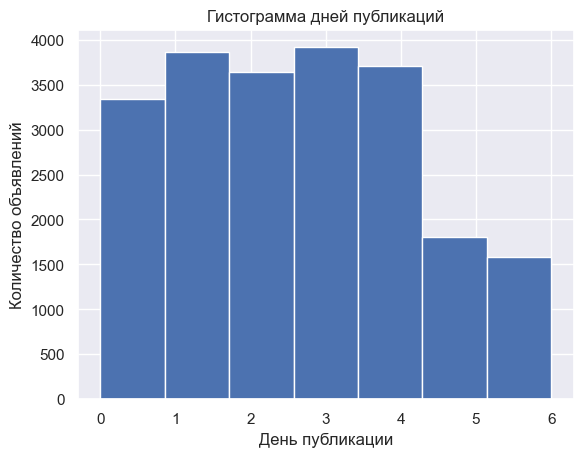

In [117]:
data['week_day'].hist(bins=7).set_title('Гистограмма дней публикаций')
plt.xlabel('День публикации')
plt.ylabel('Количество объявлений');

В выходные дни в 2 раза реже публикуются объявления по продаже недвижимости. Возможно такое падение публикаций в выходние дни связано с тем, что все заняты своими "домашними" делами, отдыхают от работы и избегают лишних звонков. 

**Месяц публикации**

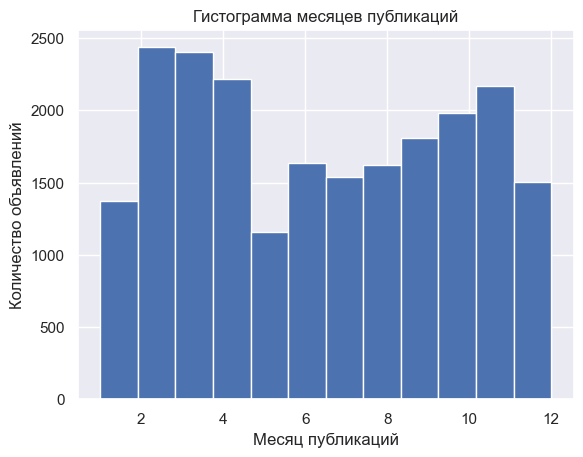

In [118]:
data['month'].hist(bins=12).set_title('Гистограмма месяцев публикаций')
plt.xlabel('Месяц публикаций')
plt.ylabel('Количество объявлений');

In [119]:
data.value_counts('month').head()

month
2.0     2436
3.0     2405
4.0     2213
11.0    2170
10.0    1979
dtype: int64

In [120]:
data.value_counts('month', ascending=True).head()

month
5.0     1160
1.0     1375
12.0    1505
7.0     1536
8.0     1620
dtype: int64

Январь - один из малочисленных месяцев по количеству публикаций. В ферале происходит пик активности и количество публикаций бьет годовой рекорд. Далее, до апреля наблюдается плавное снижение количества публикаций, пока в мае не происходит резкое падение до уровня ниже январского. Начиная с июня начинается плавный рост публикаций и длится он вплоть до ноября, пока в декабре снова не обвалится вниз. 

Самые бедные на количество публикаций месяцы: май, январь, декабрь. Вероятно, такой спад следует из большого количества праздников, выходных и подготовок к ним, на которых все стараются посвятить время нерабочим процессам, быть более мобильными и не отвлекаться на звонки потенциальных покупателей, не заниматься внезапными показами квартиры, а при удачной сделке не заниматься покупкой новой недвижимости (как правило при продаже старой квартиры деньги вкладываются в другую/новую) на праздниках.

Самые насыщенные: февраль, март, аперель. Помимо повышенной активности частных объявлений после "праздничных" месяцев, возможно те же риелторы зная о том, что в праздники люди с меньшей вероятностью будут интересоваться покупкой жилья, не выкладывают платные объявления и ждут следующий месяц мосле "праздничного", чтобы не потерять свои деньги.

<a class="anchor" id="study_sales"></a>
#### 4.2. Изучим, как быстро продавались квартиры

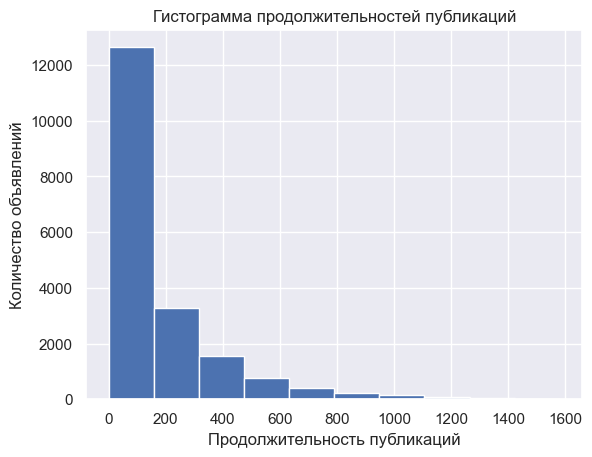

In [121]:
data['days_exposition'].hist().set_title('Гистограмма продолжительностей публикаций')
plt.xlabel('Продолжительность публикаций')
plt.ylabel('Количество объявлений');

Ранее, в предобработке, мы отсекли черезчур долгие объявления, превышающие 470 дней с момента публикации. Рассмотрим еще раз диаграмму размаха и сформулируем какие продажи можно считать быстрыми, а какие нет.

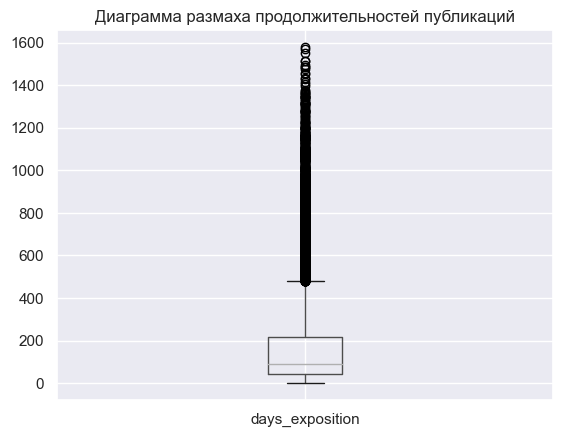

In [122]:
data.boxplot(column='days_exposition').set_title('Диаграмма размаха продолжительностей публикаций');

In [123]:
data['days_exposition'].describe()

count    19099.000000
mean       172.770773
std        211.473184
min          1.000000
25%         44.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

После удаления части значений свыше 470 медиана сместилась, поэтому у построенной снова диаграммы появились выбросы, но мы просто будем воспринимать их как значения долгой продажи. 

Будем считать, что быстрые проджи - продажи, объявления которых закрывались быстрее, чем 25% от количества дней самых долгих объявлений. Тогда долгие объявления будут те, которые закрывались дольше, чем 75% от самых долгих. А нормальными по длительности будут объявления, которые закрыли в интервале от 25% до 75%. Применительно к нашим значениям получим: быстрые продажи - если сделки совершились до 39 дней, нормальные - если сделки совершились в интервале от 40 до 169 дней, а медленные - если сделка совершена после 170 дней. Если объявления не закрываются после 470 дней, они считаются подозрительно долгими и должны рассматриваться с осторожностью, либо вовсе не включаться в выборку.

<a class="anchor" id="study_corr"></a>
#### 4.3. Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта

Посмотрим на коэффициенты корреляции Пирсона, чтобы увидеть зависимость цены от ряда факторов

In [124]:
#'floor_type', 'week_day', 'month', 'year'

In [125]:
corr_list = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']
(
data[corr_list]
    .corr()
    #.loc['total_area':, ['last_price']]
)

last_price  total_area  living_area  kitchen_area     rooms
last_price      1.000000    0.656881     0.520374      0.504137  0.358197
total_area      0.656881    1.000000     0.898162      0.440810  0.784863
living_area     0.520374    0.898162     1.000000      0.123570  0.890779
kitchen_area    0.504137    0.440810     0.123570      1.000000  0.027437
rooms           0.358197    0.784863     0.890779      0.027437  1.000000

А также построим матрицу рассеяния для количественных параметров

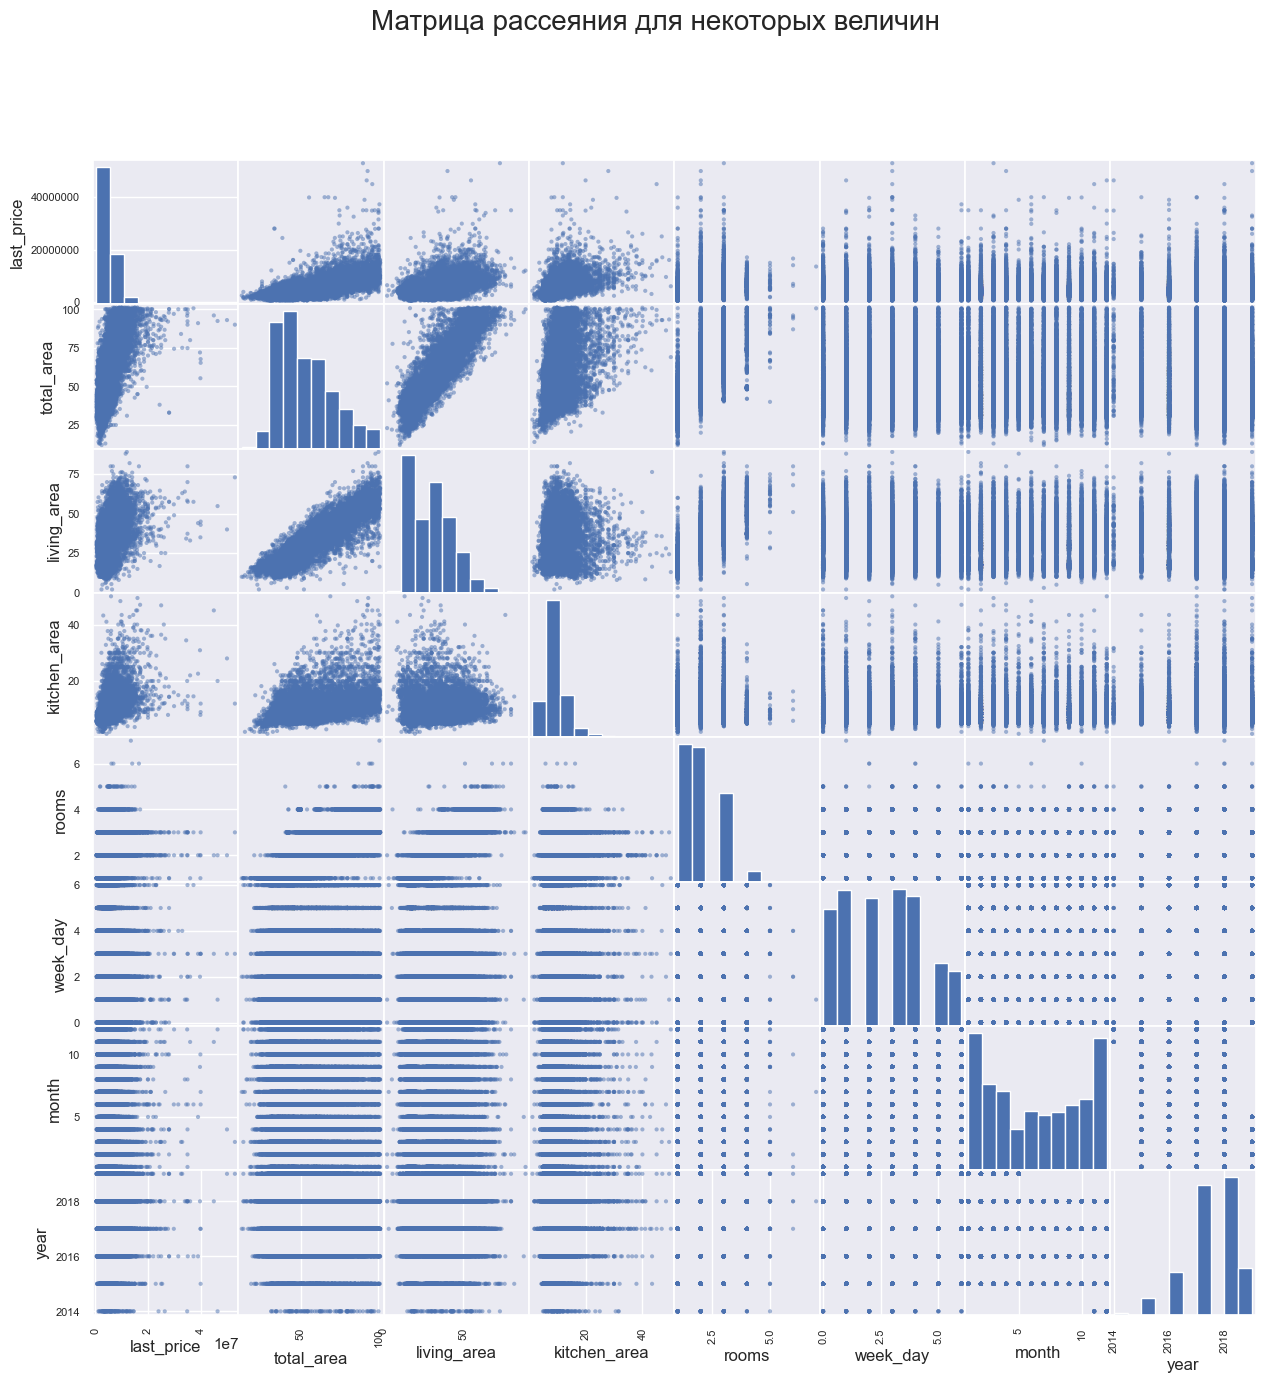

In [126]:
(pd
    .plotting
    .scatter_matrix(
        data[['last_price', 'total_area', 'living_area', 'kitchen_area', 
              'rooms', 'floor_type', 'week_day', 'month', 'year']], figsize=(15, 15))
)
plt.suptitle('Матрица рассеяния для некоторых величин', fontsize=20);

При первом взгляде видна прямая зависимость цены от площадей общей и жилой. Также наблюдается слабая корреляция с площадью кухни и количеством комнат. 

Но вот с датой размещения корреляции не нашлось вовсе. Возможно зависимость в данных более сложного нелинейного характера. Рассмотрим каждый показатель более подробно.

##### Зависимость от общей площади

Построим график зависимости цены и общей площади. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


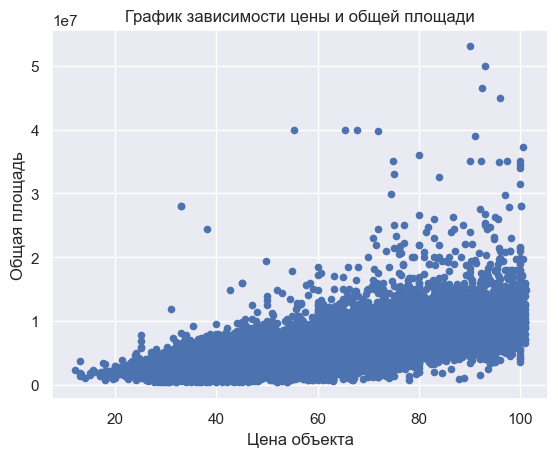

In [127]:
data.plot(x='total_area', y='last_price', kind='scatter').set_title('График зависимости цены и общей площади')
plt.xlabel('Цена объекта')
plt.ylabel('Общая площадь');

Напомним, что в предобработке данных мы отсекли подозрительные объявления, поэтому на верхней границе графиков видна четкая прямая граница, как будто график упирается в потолок. Построим для наглядности определения повышенной частоты определенных сочетаний график рассеяния

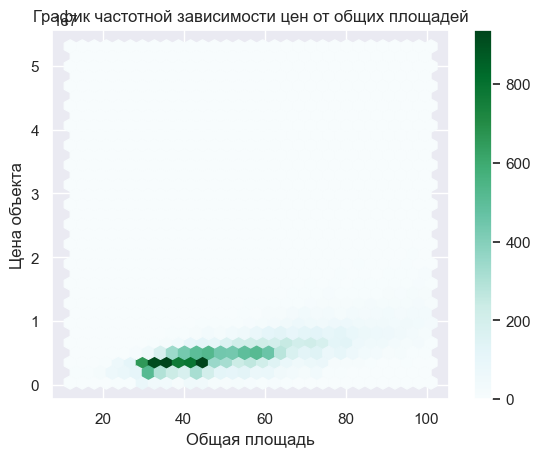

In [128]:
data.plot(x='total_area', y='last_price', kind='hexbin', sharex=False, gridsize=30).set_title('График частотной зависимости цен от общих площадей')
plt.xlabel('Общая площадь')
plt.ylabel('Цена объекта');

Итак, как уже ранее говорилось: наблюдается прямая связь между ценой и общей площадью квартиры.  Особено сильна эта связь в интервале между 30 и 60 кв.м. Вероятно это связано с тем, что в данном промежутке выше плотность значений и меньше их разброс.  

##### Зависимость от жилой площади

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


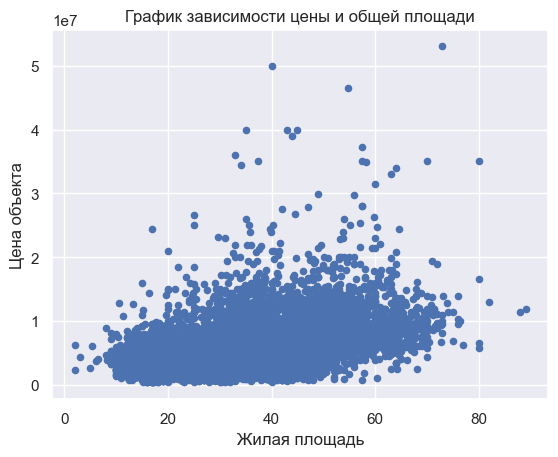

In [129]:
data.plot(x='living_area', y='last_price', kind='scatter').set_title('График зависимости цены и общей площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена объекта');

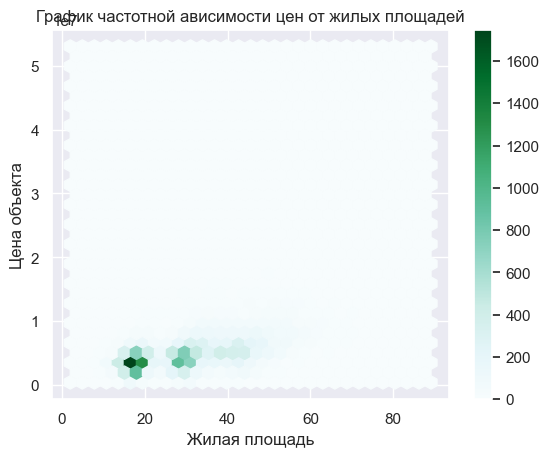

In [130]:
data.plot(x='living_area', y='last_price', kind='hexbin', sharex=False, gridsize=30).set_title('График частотной ависимости цен от жилых площадей')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена объекта');

Исходя из матрицы расеяния жилая площадь напрямую коррелирует с общей площадью, а цена также коррелирует с общей площадью. Возможно такая картина зависимости цены от жилой площади - как раз следствие зависимости жилой площади от общей. 

##### Зависимость от площади кухни

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


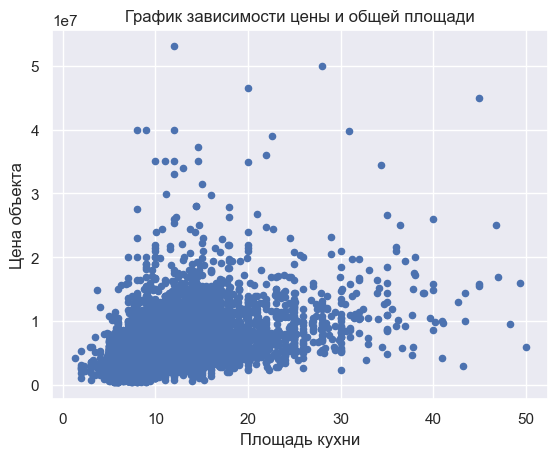

In [131]:
data.plot(x='kitchen_area', y='last_price', kind='scatter').set_title('График зависимости цены и общей площади')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена объекта');

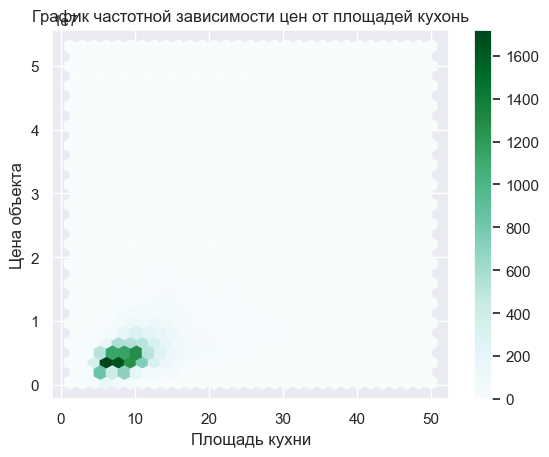

In [132]:
data.plot(x='kitchen_area', y='last_price', kind='hexbin', sharex=False, gridsize=30).set_title('График частотной зависимости цен от площадей кухонь')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена объекта');

Площадь кухни очень слабо коррелирует с стоимостью квартиры также, как слабо коррелирует с жилой площадью. Если бы связь площади кухни и общей площади была бы сильнее, то, вероятно, картина была бы другая.

##### Зависимость от количества комнат

В матрицах кореляции и рассеивания мы видели, что зависимость стоимости от количества комнат очень слабая. Но при этом связь между общей площадью и количеством комнат, а также жилой площадью и количеством комнат очень сильная, а также ранее мы выявили корреляцию между стоимостью и площадьми общей и жилой. Почему тогда связь стоимости и количества комнат столь слабая? Построим график по средним значениям

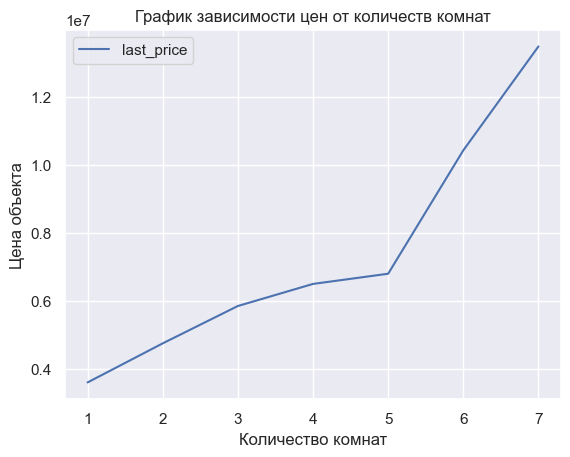

In [133]:
(data
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot()).set_title('График зависимости цен от количеств комнат')

plt.xlabel('Количество комнат')
plt.ylabel('Цена объекта');

И найдем коэффициент их корреляции 

In [134]:
data_rooms = (data
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    )

In [135]:
data_rooms['last_price'].corr(data_rooms.index.to_series())

0.9396650899923691

Мы наблюдаем очень сильную связь между *средними* значениями стоимости квартир и количеством комнат в них. Значит в данных много квартир с большим количеством комнат и низкой стоимостью, и малым количеством комнат и высокой стоимостью, из-за чего общая картина сильно искажает зависимоть количества комнат и цены. 

Такая картина с ценами может быть вызвана тем, что есть другие факторы (или целые совокупности), более сильные, которые влияют на разброс стоимости квартир с одинаковым количеством комнат (например, удаленность от центра города). Если рассматривать такие квартиры с одинаковыми факторами влияния, то стоимость будет расти с увеличением количества комнат, т.к. увеличивается жилая площадь, вслед за ней общая, а она напрямую влияет на стоимость квартиры.

Поэтому на вопрос влияет ли количество комнат на стоимость - да, влияет, но только при сравнении похожих по другим параметрам объявлений. Если же рассматривать общую картину, все объявления что есть, количество комнат практически не сказывается на стоимости.

**Зависимость от даты размещения**

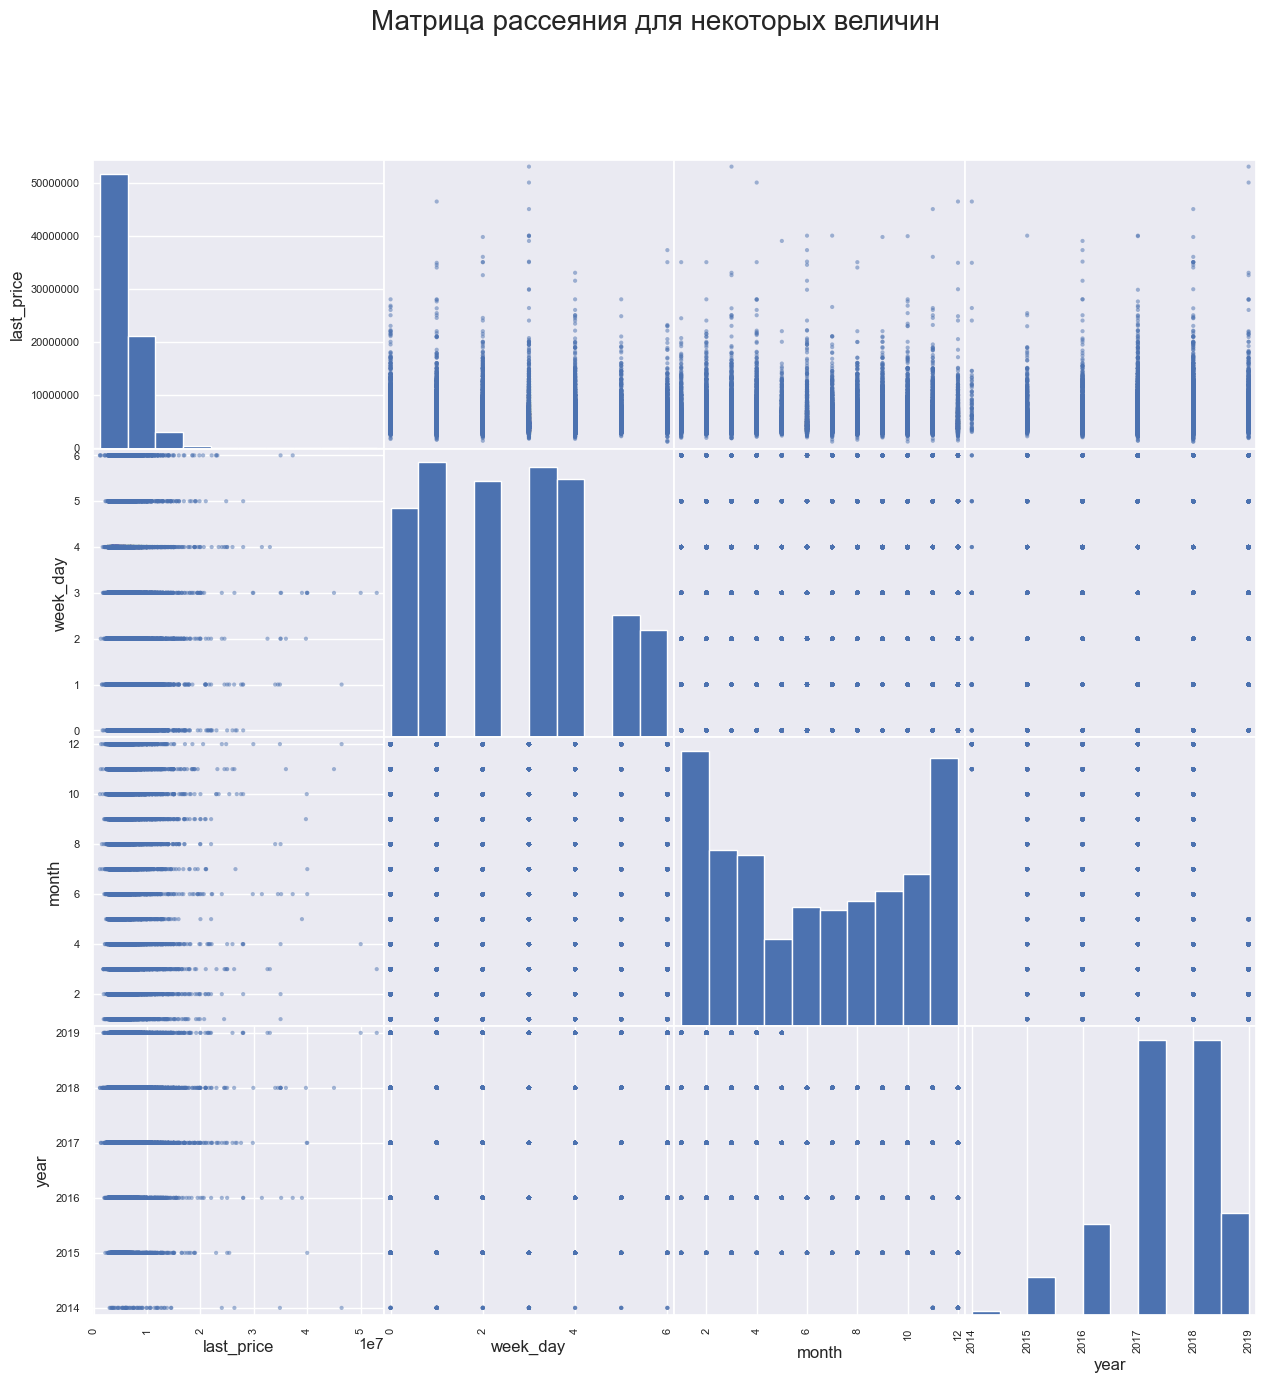

In [136]:
(pd
    .plotting
    .scatter_matrix(
        data.query('locality_name == "Санкт-Петербург"')[['last_price', 'week_day', 'month', 'year']], figsize=(15, 15))
)
plt.suptitle('Матрица рассеяния для некоторых величин', fontsize=20);

##### Зависимость от года

Итак, судя по матрицам корреляции и рассеивания зависимости цены от года публикации нет. Глянем на усредненные показатели цен по годам

In [137]:
data.value_counts('year').to_frame()

0
year        
2018.0  8009
2017.0  7535
2019.0  2694
2016.0  2507
2015.0   998
2014.0    98

Построим график по средним значениям стоимости квартир ежегодно

In [138]:
data_year = data.pivot_table(index='year', values='last_price', aggfunc='median')

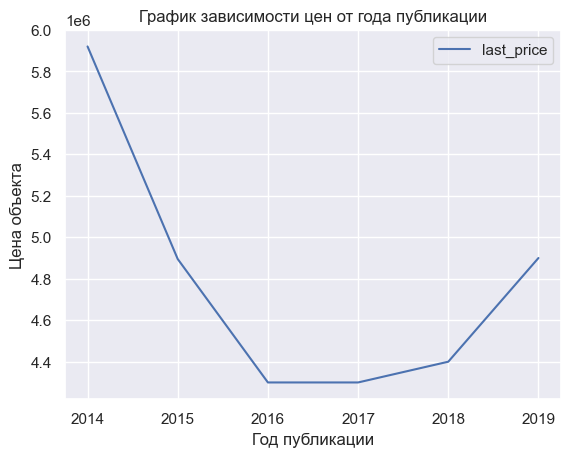

In [139]:
data_year.plot().set_title('График зависимости цен от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Цена объекта');

В конце концов цены на недвижимость зависит от года публикации объявлений. Мы видим, как меняется стоимость с течением времени: буквально за 2 года цена упала на 1.6 млн, затем год держалась без изменений, а потом начала плавно расти. Зная год публикации среднестатистической квартиры мы с определенной долей вероятности можем предсказать среднюю ее цену. 

Такое поведение цен может быть связано с общей динамикой цен на недвижимость в стране, а также с другими факторами, напрямую влияющие на стоимость. Ранее мы убедились, что цена недвижимости напрямую зависит от ее площади. Сравним динамику цен продаваемых квартир с динамикой цен за квадратный метр и с динамикой площадей, чтобы определить какой фактор влияет на нее больше.

Построим график, отражающий динамику цены за квадратный метр

In [140]:
dinamics_square = data.pivot_table(index='year', values='price_of_square', aggfunc='median')

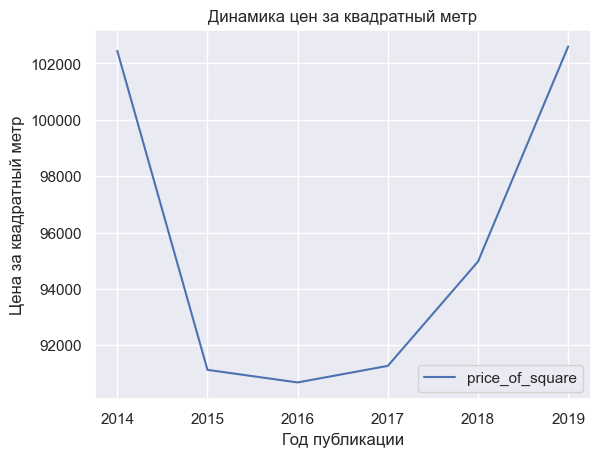

In [141]:
data.pivot_table(index='year', values='price_of_square', aggfunc='median').plot().set_title('Динамика цен за квадратный метр')
plt.xlabel('Год публикации')
plt.ylabel('Цена за квадратный метр');

Корреляция цены и стоимости за квадратный метр

In [142]:
data_year['last_price'].corr(dinamics_square['price_of_square'])

0.7305277098465749

Мы наблюдаем, как стоимость за квадратный метр, с 2014го, за один год резко упала, потом на протяжении 2х лет почти не менялась, а затем, за 2 года, снова вернулась на отметку 2014го года. Но на графике динамики цен мы не наблюдаем такой картины. Значит, возможно, на среднюю стоимость квартир оказывает воздействие более сильный фактор.

Построим график, отражающий динамику площадей продаваемых квартир

In [143]:
dinamics_area = data.pivot_table(index='year', values='total_area', aggfunc='median')

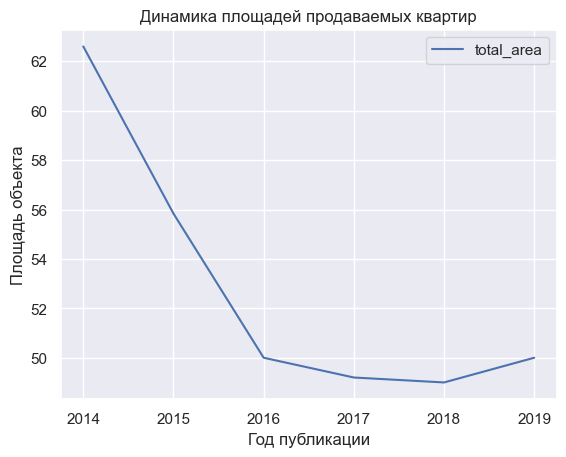

In [144]:
data.pivot_table(index='year', values='total_area', aggfunc='median').plot().set_title('Динамика площадей продаваемых квартир')
plt.xlabel('Год публикации')
plt.ylabel('Площадь объекта');

Корреляция цены и площади

In [145]:
data_year['last_price'].corr(dinamics_area['total_area'])

0.9275057231792586

График динамики площадей очень похоже описывает изменение общих цен продаваемых квартир, а также прямолинейную зависимость отражает коэффициент корреляции. Значит динамика средней стоимости квартир обусловлена изменением не только и не сколько стоимостью квадратного метра, сколько изменением площадей недвижимости.

##### Зависимость от месяца

Выведем график цены и средней стоимости в каждый месяц

In [146]:
data_month = (data
    .query('year > 2015')
    .pivot_table(index='month', values='last_price', aggfunc='median'))

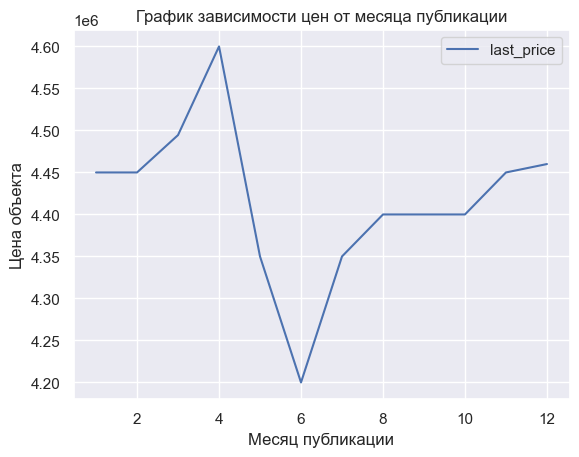

In [147]:
data_month.plot().set_title('График зависимости цен от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена объекта');

Связь, на первый взгляд, не видна. Рассмотрим каждый месяц индивидуально. Построим графики по месяцам, чтобы понять характер изменения стоимостей

In [148]:
data_month_2016 = data.query('year == 2016').pivot_table(index='month', values='last_price', aggfunc='median')
data_month_2017 = data.query('year == 2017').pivot_table(index='month', values='last_price', aggfunc='median')
data_month_2018 = data.query('year == 2018').pivot_table(index='month', values='last_price', aggfunc='median')
data_month_2019 = data.query('year == 2019').pivot_table(index='month', values='last_price', aggfunc='median')

In [149]:
list_2016 = data_month_2016['last_price'].to_list()
list_2017 = data_month_2017['last_price'].to_list()
list_2018 = data_month_2018['last_price'].to_list()
list_2019 = data_month_2019['last_price'].to_list()

В базе за 2019й оказалось недостаточно месяцев, чтобы корректно построить график. Чтобы отобразить его, заполним недостающие строки значением, на котором записи закончились, чтобы получилась прямая линия. 

In [150]:
list_2019 = [4599500.0, 4799000.0, 4605000.0, 4700000.0, 4400000.0, 4400000.0, 4400000.0, 4400000.0, 4400000.0, 4400000.0, 4400000.0, 4400000.0]

In [151]:
df1 = pd.DataFrame({
    2016: list_2016,
    2017: list_2017,
    2018: list_2018,
    2019: list_2019
})

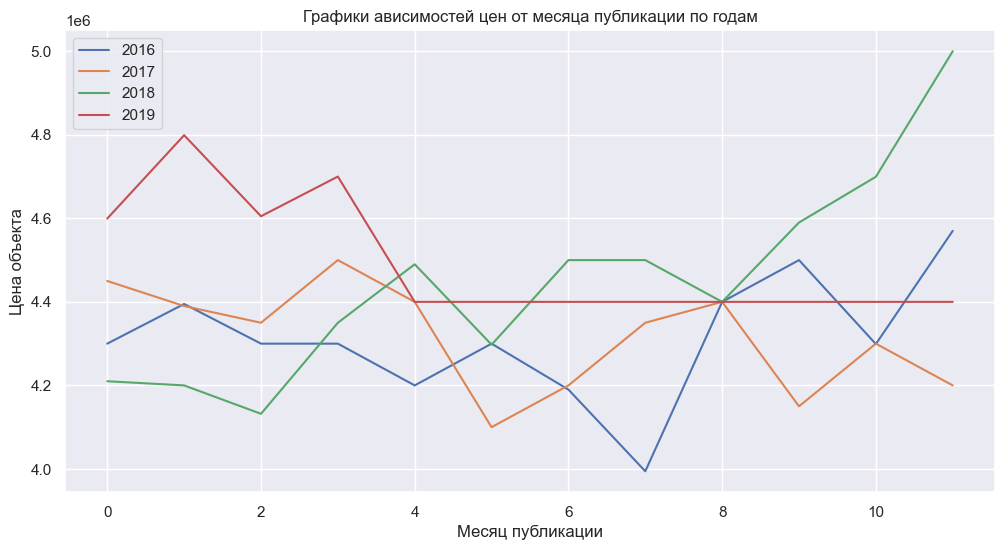

In [152]:
df1.plot(figsize=(12, 6)).set_title('Графики ависимостей цен от месяца публикации по годам')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена объекта');

Цены от месяца к месяцу ведут себя хаотично. Мы наблюдаем лишь повышение средней стоимости за последние два года, как было сказано ранее. Скорее всего зависимости действительно нет и на цену оказывают влияние другие факторы, но не сезонность.

##### Зависимость от дня недели

Выведем график цены и средней стоимости в каждый день недели

In [153]:
data_week = data.pivot_table(index='week_day', values='last_price', aggfunc='median')

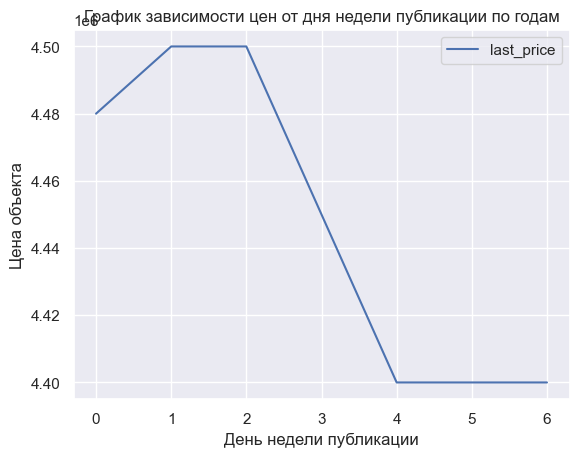

In [154]:
data_week.plot().set_title('График зависимости цен от дня недели публикации по годам')
plt.xlabel('День недели публикации')
plt.ylabel('Цена объекта');

Но по графику пока ничего не понятно. 

Нам не интересна зависимость касательно дня недели в определенный месяц. Поэтому усредним все значения цен по годам и сравним на графике, как делали при рассмотрении месяцев

In [155]:
data_week_2016 = data.query('year == 2016').pivot_table(index='week_day', values='last_price', aggfunc='median')
data_week_2017 = data.query('year == 2017').pivot_table(index='week_day', values='last_price', aggfunc='median')
data_week_2018 = data.query('year == 2018').pivot_table(index='week_day', values='last_price', aggfunc='median')
data_week_2019 = data.query('year == 2019').pivot_table(index='week_day', values='last_price', aggfunc='median')

In [156]:
wlist_2016 = data_week_2016['last_price'].to_list()
wlist_2017 = data_week_2017['last_price'].to_list()
wlist_2018 = data_week_2018['last_price'].to_list()
wlist_2019 = data_week_2019['last_price'].to_list()

In [157]:
df2 = pd.DataFrame({
    2016: wlist_2016,
    2017: wlist_2017,
    2018: wlist_2018,
    2019: wlist_2019
})

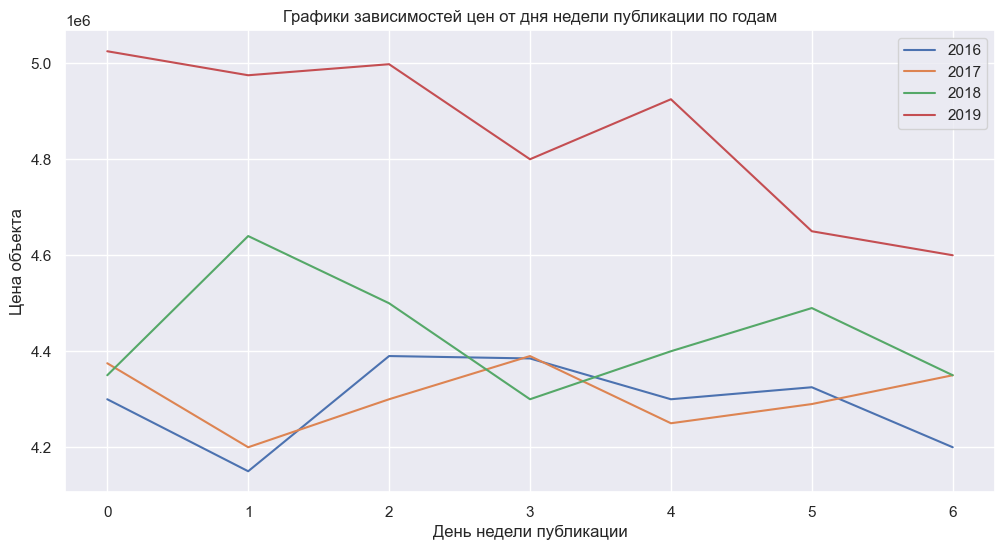

In [158]:
df2.plot(figsize=(12, 6)).set_title('Графики зависимостей цен от дня недели публикации по годам')
plt.xlabel('День недели публикации')
plt.ylabel('Цена объекта');

Снова видим повышение средней стоимости недвижимоти за последние пару лет, но характерного поведения графика в определенные дни недели нет. Следовательно можно утверждать, что стоимость объявления не зависит от дня недели, в котором было опубликовано объявление.

<a class="anchor" id="count_price_of_square"></a>
#### 4.4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

Посмотрим на распределение цен за квадратный метр

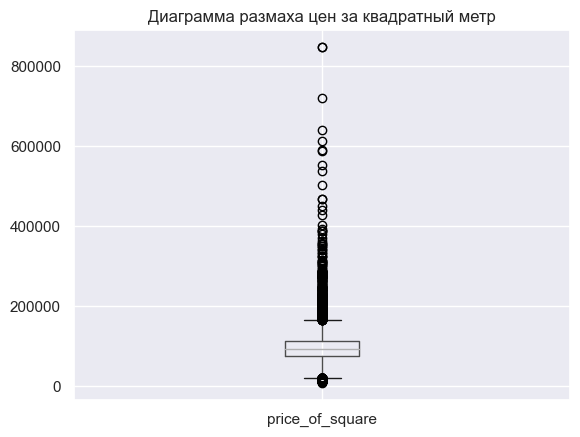

In [159]:
data.boxplot(column='price_of_square').set_title('Диаграмма размаха цен за квадратный метр');

Видим очень большой разброс значений и наличие выбросов. Для подсчета средней стоимости будем использовать медианное среднее

In [171]:
# создадим сводную по населенным пунктам и посчитаем количество объявлений и среднюю цену квадрата
pivot_square = (
data
    .pivot_table(index='locality_name', values='price_of_square', aggfunc=['count', 'median'])
    .round()
)

# переименуем колонки
pivot_square.columns = ['count', 'median']

# оставим 10 населенных пунктов, с наибольшим числом объявлений
top10_square = pivot_square.sort_values('count', ascending=False)[:10]

Изобразим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

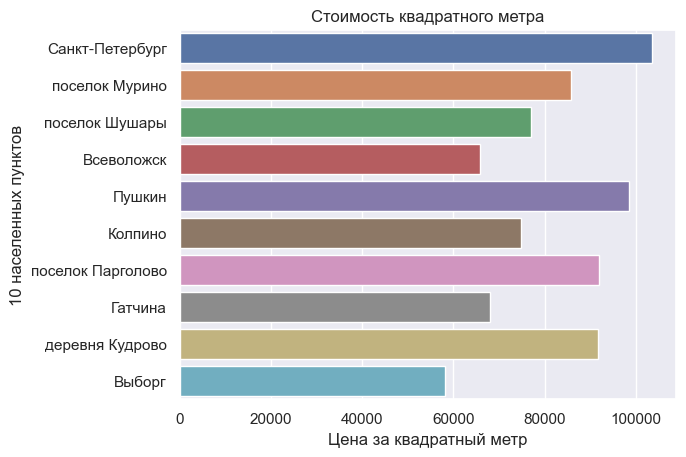

In [174]:
sns.barplot(y=top10_square.index, x='median', data=top10_square).set_title('Стоимость квадратного метра')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('10 населенных пунктов');

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [162]:
# выведем отсортируем записи в порядке уменьшения стоимости за квадрат и выведем первую 
    # и последнюю строчку
top10_square.sort_values('median', ascending=False).iloc[[0, -1]]

count    median
locality_name                   
Санкт-Петербург  14074  103636.0
Выборг             224   58233.0

Мы выделили десять населенных пунктов с наибольшим количеством объявлений. Самая высокая стоимость за квадратный метр в Санкт-Петербурге - *103 636 руб с количеством объявлений равное 14074.* Самая низкая цена в этой десятке у Выборга - *58 233 руб* с количеством объявлений - 224. 

<a class="anchor" id="corr_price_and_center"></a>
#### 4.5. Опишем, как стоимость объектов зависит от расстояния до центра города

Создадим новый датасет с информацией только по Санкт-Петербургу и удалим пропуски в столбце с расстоянием до центра города, т.к. такие записи нам не будут полезны

In [163]:
data_SP = data.copy()

In [164]:
data_SP = data_SP.query(
              '(locality_name == "Санкт-Петербург")'
              )

data_SP = data_SP.dropna(subset=['city_centers_nearest_km']).reset_index()

Создадим столбец с средними ценами, приходящиеся на один километра, для каждого объявления

In [165]:
data_SP['price_of_km'] = (data_SP['last_price'] / data_SP['city_centers_nearest_km']).round()

data_SP['price_of_km'] = data_SP['price_of_km'].where(data_SP['city_centers_nearest_km'] != 0, data_SP['last_price'])

Создадим сводную с средними ценами недвижимости, характерным для разной удаленности от центра с шагом в километр

In [166]:
pivot_of_km = (
    data_SP.pivot_table(index='city_centers_nearest_km', values='price_of_km', aggfunc='median')
    .round())

pivot_of_km

price_of_km
city_centers_nearest_km             
0.0                       12500000.0
1.0                        9000000.0
2.0                        4272250.0
3.0                        2441666.0
4.0                        1900000.0
5.0                        1540000.0
6.0                        1216667.0
7.0                         953572.0
8.0                         815312.0
9.0                         566667.0
10.0                        490000.0
11.0                        450000.0
12.0                        405000.0
13.0                        392308.0
14.0                        341071.0
15.0                        320000.0
16.0                        293750.0
17.0                        266471.0
18.0                        234722.0
19.0                        236842.0
20.0                        276250.0
21.0                        250226.0
22.0                        219318.0
23.0                        191304.0
24.0                        145000.0
25.0                        151795.0
26.0                        127692.0
27.0                        307407.0
28.0                        161822.0
29.0                        156380.0

Найдем разницу между средними ценами квартир за каждый километр удаленности от центра

In [167]:
diff_km = (pivot_of_km.shift() - pivot_of_km).round()
diff_km

price_of_km
city_centers_nearest_km             
0.0                              NaN
1.0                        3500000.0
2.0                        4727750.0
3.0                        1830584.0
4.0                         541666.0
5.0                         360000.0
6.0                         323333.0
7.0                         263095.0
8.0                         138260.0
9.0                         248645.0
10.0                         76667.0
11.0                         40000.0
12.0                         45000.0
13.0                         12692.0
14.0                         51237.0
15.0                         21071.0
16.0                         26250.0
17.0                         27279.0
18.0                         31749.0
19.0                         -2120.0
20.0                        -39408.0
21.0                         26024.0
22.0                         30908.0
23.0                         28014.0
24.0                         46304.0
25.0                         -6795.0
26.0                         24103.0
27.0                       -179715.0
28.0                        145585.0
29.0                          5442.0

In [168]:
print('Максимальная цена за однокомнатную квартиру в самом центре:')
data_SP.query('city_centers_nearest_km == 0')['last_price'].max()

Максимальная цена за однокомнатную квартиру в самом центре:


50000000.0

In [169]:
print('Минимальная цена за однокомнатную квартиру в километре от центра:')
data_SP.query('city_centers_nearest_km == 1')['last_price'].min()

Минимальная цена за однокомнатную квартиру в километре от центра:


2400000.0

Рассмотрим объявления относительно расстояния до центра. Мы видим, что чем объект ближе к центру города, тем выше его стоимость. Разница между первым и вторым километрами составляет примерно *4.7 млн.*, а между вторым и третьим *1.8 млн.* и так далее по убыванию.

До *13 км* радиуса от центра удаленность влияет на цену, после чего стоимость перестает коррелировать с ней. Между 12ым и 13ым километром средняя цена за клометр составляет мизерные *12 692 руб.*

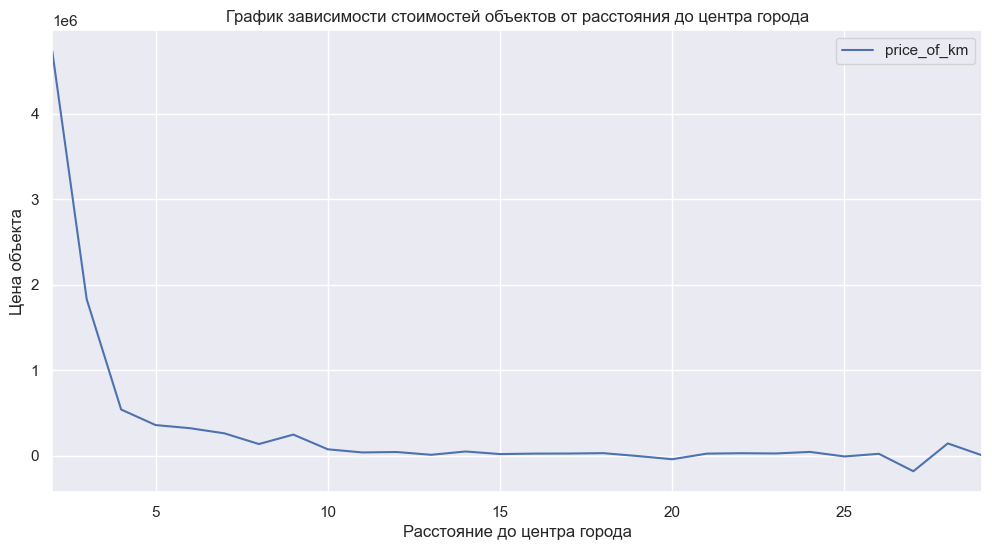

In [170]:
diff_km.plot(xlim=(2, 29), figsize=(12, 6)).set_title('График зависимости стоимостей объектов от расстояния до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Цена объекта');

<a class="anchor" id="conslusion"></a>
### 5. Общий вывод

**Замечения к сервису:**
- Если парки и водоемы не так вляиют на стоимость, то количество балконов и этаж - важные параметры и нужно сделать обязательным пунктом заполнения при создании объявления, потому что клиентам не понятно: балконы не указали потому что забыли или их вовсе нет.
- Также сделать обязательным поле заполнения населенного пункта: в данных встречаются пропуски в этом пункте, что делает объявление автоматически непригодным.
- Добавить необходимость выбирать тип объекта: квартира, нежилое помещение, коттедж, а также сделать обязательным поле с булевым выбором апартаментов, чтобы не возникало вопросов связаных с очень большим разбросом цен, площадей, с количеством комнат равных нулю и высотами потолков от одного метра до десятков.
- Рассмотреть возможность выбора населенного пункта из готового списка, чтобы не возникало проблем с дубликатами с разными названиями.
- Если сервис не рассчитан на аренду жилья, убрать возможность ставить неадекватно низкие цены, чтобы по ошибке в базу не попадали такие объявления.
- Рассмотреть возможность добавления подсказки для клиента с ориентировкой на среднюю рыночную стоимость похожей по параметрам квартиры, чтобы кленты ставили высокие цены основательно и осознанно.
- Отдельный вопрос касается восот потолков: клиенты могут ввести в эту графу любые цифры, хотя высота потолков 1.5м для жилого помещения нереальна. Это влечет ложные данные и ошибки при анализе и лучше иметь в этом пункте пропуск, чем некорректные значения. В идеале продумать возможность выбора из ограниченного набора значений, ведь высоты потолков для однотипных помещений имеют ограниченный диапазон значений. Это исключит выдающиеся нереалистичные значения, а также с психологической точки зрения клиент будет более ответственно относиться к этому параметру.
- Также необходимо добавить лимит на срок размещения объявления с возможностью продления, чтобы база не замусорилась старыми, не актуальными, фальшивыми объявлениями сроком давности более 3х лет. При анализе выявлено, что если сделка не совершена после 170 дней со дня размещения, она считается медленной. Поэтому считаю, что максимальный срок размещения пол-года (180 дней) - подходящий интервал для необходимости заново разместить объявление, при необходимости обновить фотографии и скорректировать цену.
- Добавить полезный для анализа показатель - цену за квадратный метр.


**Выводы по исследованию:**
- Быстрой продажей считается, если сделка совершилась до 39 дней, нормальная - если сделка совершилась в интервале от 40 до 169 дней, а медленная - если сделка совершена после 170 дней. Если объявление не закрывается после 470 дней, оно считается подозрительно долгим и должно рассматриваться с осторожностью, либо вовсе не включаться в рассмотрение.
- Стоимость квартиры напрямую зависит от общей и жилой площади: чем больше площадь, тем выше стоимость.
- Если взять квартиры с близкими параметрами, то с увеличением количества комнат будет возрастать цена квартиры.
- Стоимость недвижимости зависит от года публикации: если необходимо рассчитать стоимость квартиры, нужно учитывать среднерыночную стоимость аналогичного объекта в текущем году, т.к. цены постоянно меняются в ту или другую сторону, что обусловлено как изменением цен за квадратный метр, так и ежегодным изменением общих площадей продаваемых квартир.
- В десятке наиболее популярных населенных пунктов самая высокая стоимость за квадратный метр в Санкт-Петербурге - 103 636 руб. Самая низкая цена в этой десятке у Выборга - 58 233 руб.
- Расстояние до центра города влияет на стоимость квартиры: чем объект ближе к центру города, тем выше его стоимость. Эта зависимость заканчивается на 13 км от центра. **Разница между средними ценами квартир за каждый километр удаленности от центра:**
     - 1 км - 3 500 000 руб
     - 2 км - 4 727 750  руб
     - 3 км - 1 830 584 руб
     - 4 км - 541 666 руб
     - 5 км - 360 000 руб
     - 6 км - 323 333 руб
     - 7 км - 263 095 руб
     - 8 км - 138 260 руб
     - 9 км - 248 645 руб
     - 10 км - 76 667 руб
     - 11 км - 40 000 руб
     - 12 км - 45 000 руб
     - 13 км - 12 692 руб
     
[К оглавлению](#toc)